# Cervical cancer risk factors in low - income countries .

## By Doron Man

# 1. Abstract

Cervical cancer is the second most common cancer in women worldwide.
Although it has been relatively well controlled in many high-income countries, it remains the no 1 cause of cancer-related death in  low-income and countries.

Cytology screening  technique has lead to effective reduction in the mortality from cervical cancer in many developed countries.
However, this approach has failed to attain the same results in low income countries.

# 2. Objectivs 

My objective is to see if machine learning, can help to implement a more simple visual inspection test, that can 
replace cytology with an acceptable level of accuracy.

# 3. Target Value

Biopsy

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

Importing pandas matplotlib seaborn numpy sklearn libraryes and more...

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from scipy import stats

from sklearn import tree

import shap

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from imblearn.over_sampling import SMOTENC

from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning

from sklearn.utils.testing import ignore_warnings

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score

from sklearn.metrics import confusion_matrix, mean_absolute_error,\
accuracy_score, classification_report,roc_curve, roc_auc_score,precision_score,recall_score,mean_squared_error,\
f1_score,cohen_kappa_score,confusion_matrix,log_loss,precision_recall_curve,average_precision_score,auc

from sklearn.ensemble import RandomForestClassifier

from mlxtend.plotting import plot_decision_regions


import xgboost as xgb

import optuna 
from optuna import trial, visualization
from optuna.samplers import TPESampler






%matplotlib inline

/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Data

The data was obtained from University Hospital of Caracas and it comprises demographic information, habits, and historic medical records of 858 patients.

# Loading data and taking a first look at it.

Loading Cervical cencer risk factores csv File into pandas dataframe.

In [6]:
df = pd.read_csv("../data/datasets-2013-3857-kag_risk_factors_cervical_cancer.csv")

### Dictionary - Dataset Feature list
IUD - Intra Uterine Device (a form of contraceptive)

STDs - Sexually Transmitted Diseases

HPV - Human Papilloma Virus

HIV - Human Immunodeficiency Virus

AIDS - Acquired Immunodeficiency Syndrome (caused by HIV)

CIN - Cervical Intraepithelial Neoplasia

Dx - Medical Abbreviation for Diagnosis

Dx:Cancer (person had previous cervical cancer diagnostic)

Dx:CIN (person had previous diagnostic of Cervical intraepithelial neoplasia)

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA - Preliminary


First I'm going to check the shape of the data, the statistical info, like percentile, mean and std of the numerical values, The data types of each column and memory usage of the entire data.


In [3]:
df.shape

(858, 36)

In [4]:
pd.set_option('display.max_columns',36)

In [5]:
df.describe()

Age  STDs: Number of diagnosis   Dx:Cancer      Dx:CIN  \
count  858.000000                 858.000000  858.000000  858.000000   
mean    26.820513                   0.087413    0.020979    0.010490   
std      8.497948                   0.302545    0.143398    0.101939   
min     13.000000                   0.000000    0.000000    0.000000   
25%     20.000000                   0.000000    0.000000    0.000000   
50%     25.000000                   0.000000    0.000000    0.000000   
75%     32.000000                   0.000000    0.000000    0.000000   
max     84.000000                   3.000000    1.000000    1.000000   

           Dx:HPV          Dx  Hinselmann    Schiller    Citology      Biopsy  
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000  
mean     0.020979    0.027972    0.040793    0.086247    0.051282    0.064103  
std      0.143398    0.164989    0.197925    0.280892    0.220701    0.245078  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Now lets look at the first 10 raws of the data.

In [20]:
df.head(10)

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   
5   42                       3.0                     23.0                2.0   
6   51                       3.0                     17.0                6.0   
7   26                       1.0                     26.0                3.0   
8   45                       1.0                     20.0                5.0   
9   44                       3.0                     15.0                  ?   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   
5    0.0            0.0                 0.0                     0.0   
6    1.0           34.0                 3.4                     0.0   
7    0.0            0.0                 0.0                     1.0   
8    0.0            0.0                 0.0                     0.0   
9    1.0    1.266972909                 2.8                     0.0   

  Hormonal Contraceptives (years)  IUD IUD (years) STDs STDs (number)  \
0                             0.0  0.0         0.0  0.0           0.0   
1                             0.0  0.0         0.0  0.0           0.0   
2                             0.0  0.0         0.0  0.0           0.0   
3                             3.0  0.0         0.0  0.0           0.0   
4                            15.0  0.0         0.0  0.0           0.0   
5                             0.0  0.0         0.0  0.0           0.0   
6                             0.0  1.0         7.0  0.0           0.0   
7                             2.0  1.0         7.0  0.0           0.0   
8                             0.0  0.0         0.0  0.0           0.0   
9                             0.0    ?           ?  0.0           0.0   

  STDs:condylomatosis STDs:cervical condylomatosis  \
0                 0.0                          0.0   
1                 0.0                          0.0   
2                 0.0                          0.0   
3                 0.0                          0.0   
4                 0.0                          0.0   
5                 0.0                          0.0   
6                 0.0                          0.0   
7                 0.0                          0.0   
8                 0.0                          0.0   
9                 0.0                          0.0   

  STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   
5                         0.0                                0.0   
6                         0.0                                0.0   
7                         0.0                                0.0   
8                         0.0                                0.0   
9                         0.0                                0.0   

  STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  \
0           0.0                              0.0                 0.0   
1           0.0                              0.0

* It looks like all the missing values were marked with a "?". I'm going to replace the "?" with nan (not a number) so I can print stats of the missing values.

In [21]:
df = df.replace('?', np.nan)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number_of_sexual_partners           832 non-null    object
 2   First_sexual_intercourse            851 non-null    object
 3   Num_of_pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes_(years)                      845 non-null    object
 6   Smokes_(packs/year)                 845 non-null    object
 7   Hormonal_Contraceptives             750 non-null    object
 8   Hormonal_Contraceptives_(years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD_(years)                         741 non-null    object
 11  STDs                                753 non-null    object

* Replacing columns names spaces with underscore so I'll be able to work with dot notations.

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

Taking a closer look at the Data types.

In [23]:
df.select_dtypes(include=['int']).dtypes

Age                          int64
STDs:_Number_of_diagnosis    int64
Dx:Cancer                    int64
Dx:CIN                       int64
Dx:HPV                       int64
Dx                           int64
Hinselmann                   int64
Schiller                     int64
Citology                     int64
Biopsy                       int64
dtype: object

In [24]:
df.select_dtypes(include=['object']).dtypes

Number_of_sexual_partners             object
First_sexual_intercourse              object
Num_of_pregnancies                    object
Smokes                                object
Smokes_(years)                        object
Smokes_(packs/year)                   object
Hormonal_Contraceptives               object
Hormonal_Contraceptives_(years)       object
IUD                                   object
IUD_(years)                           object
STDs                                  object
STDs_(number)                         object
STDs:condylomatosis                   object
STDs:cervical_condylomatosis          object
STDs:vaginal_condylomatosis           object
STDs:vulvo-perineal_condylomatosis    object
STDs:syphilis                         object
STDs:pelvic_inflammatory_disease      object
STDs:genital_herpes                   object
STDs:molluscum_contagiosum            object
STDs:AIDS                             object
STDs:HIV                              object
STDs:Hepat

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

Now let's examine the target value (Biopsy).

In [25]:
df['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

We can see that this dataset is unbalanced. This is something I need to keep in mind when moving to the machine learning stage.
In the meantime let's look at rows with positive Biopsy result.

In [26]:
df.groupby('Biopsy').get_group(1).head()

Age Number_of_sexual_partners First_sexual_intercourse Num_of_pregnancies  \
6    51                       3.0                     17.0                6.0   
22   40                       1.0                     18.0                1.0   
23   40                       1.0                     20.0                2.0   
41   37                       2.0                     18.0                NaN   
44   37                       3.0                     19.0                3.0   

   Smokes Smokes_(years) Smokes_(packs/year) Hormonal_Contraceptives  \
6     1.0           34.0                 3.4                     0.0   
22    0.0            0.0                 0.0                     1.0   
23    0.0            0.0                 0.0                     1.0   
41    0.0            0.0                 0.0                     0.0   
44    1.0           12.0                 6.0                     1.0   

   Hormonal_Contraceptives_(years)  IUD IUD_(years) STDs STDs_(number)  \
6                              0.0  1.0         7.0  0.0           0.0   
22                            0.25  0.0         0.0  1.0           2.0   
23                            15.0  0.0         0.0  0.0           0.0   
41                             0.0  NaN         NaN  1.0           1.0   
44                            13.0  0.0         0.0  0.0           0.0   

   STDs:condylomatosis STDs:cervical_condylomatosis  \
6                  0.0                          0.0   
22                 1.0                          0.0   
23                 0.0                          0.0   
41                 0.0                          0.0   
44                 0.0                          0.0   

   STDs:vaginal_condylomatosis STDs:vulvo-perineal_condylomatosis  \
6                          0.0                                0.0   
22                         0.0                                1.0   
23                         0.0                                0.0   
41                         0.0                                0.0   
44                         0.0                                0.0   

   STDs:syphilis STDs:pelvic_inflammatory_disease STDs:genital_herpes  \
6            0.0                              0.0                 0.0   
22           0.0                              0.0                 0.0   
23           0.0                              0.0                 0.0   
41           0.0                              0.0                 0.0   
44           0.0                              0.0                 0.0   

   STDs:molluscum_contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis_B STDs:HPV  \
6                         0.0       0.0      0.0              0.0      0.0   
22                        0.0       0.0      0.0              0.0      0.0   
23                        0.0       0.0      0.0              0.0      0.0   
41                        0.0       0.0      1.0              0.0      0.0   
44                        0.0       0.0      0.0              0.0      0.0   

    STDs:_Number_of_diagnosis STDs:_Time_since_first_diagnosis  \
6                           0                              NaN   
22                          1                              2.0   
23                          0                              NaN   
41                          1                             15.0   
44                          0                              NaN   

   STDs:_Time_since_last_diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  \
6                              NaN          0       0       0   0           1   
22                             2.0          0       0       0   0           0   
23                             NaN          1       0       1   0           1   
41                            15.0          0       1       0   1           0   
44                             NaN          0       0       0   0           0   

    Schiller  Citology  Biopsy  
6          1         0       1  
22         1         1       1  
23

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Munging

Printing percantage of missing values. Columns with more then 90% missing values will be droped.

In [27]:
print("Per-cent of missing values per feasture") 
round(df.isnull().sum() * 100 / len(df))

Per-cent of missing values per feasture


Age                                    0.0
Number_of_sexual_partners              3.0
First_sexual_intercourse               1.0
Num_of_pregnancies                     7.0
Smokes                                 2.0
Smokes_(years)                         2.0
Smokes_(packs/year)                    2.0
Hormonal_Contraceptives               13.0
Hormonal_Contraceptives_(years)       13.0
IUD                                   14.0
IUD_(years)                           14.0
STDs                                  12.0
STDs_(number)                         12.0
STDs:condylomatosis                   12.0
STDs:cervical_condylomatosis          12.0
STDs:vaginal_condylomatosis           12.0
STDs:vulvo-perineal_condylomatosis    12.0
STDs:syphilis                         12.0
STDs:pelvic_inflammatory_disease      12.0
STDs:genital_herpes                   12.0
STDs:molluscum_contagiosum            12.0
STDs:AIDS                             12.0
STDs:HIV                              12.0
STDs:Hepati

In [28]:
df = df.drop(['STDs:_Time_since_first_diagnosis', 'STDs:_Time_since_last_diagnosis'],axis=1)

###### Replacing missing values

Using median and mod to replace missing values

In [34]:
for feature in df.keys():
        if len(df[feature].unique()) < 4 :
                df[feature]=df[feature].fillna(df[feature].value_counts().idxmax())
        else :
                  df[feature]=df[feature].fillna(df[feature].median())

###### Chaniging object data types to int64

In [35]:
for column in df:
    if df[column].dtype != 'int64' :
        df[column] = pd.to_numeric(df[column])

# EDA - Continued

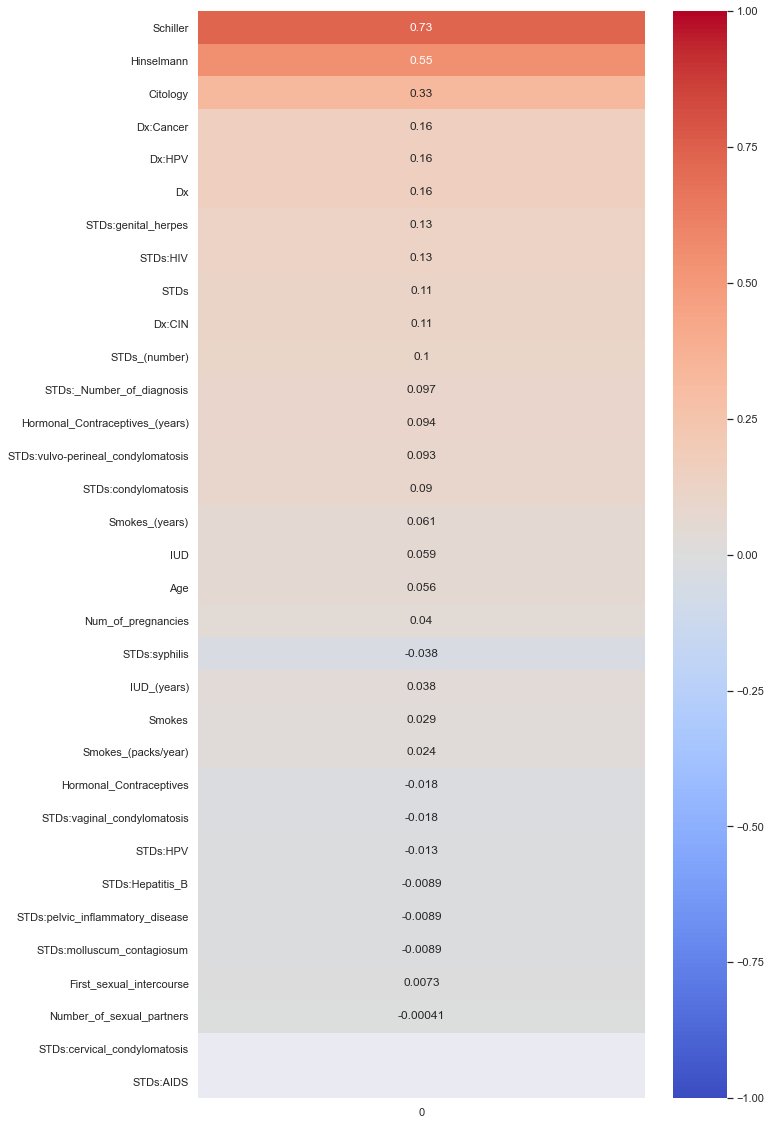

In [36]:
sns.set()
correlations = df.corrwith(df['Biopsy'], drop=False).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);
plt.savefig('line_plot_hq.png', dpi=72)  

From the above heatmap we can see that the strongets corolated features to the target (Biopsy), are the Schiller's test, the Hinselmann test and cytology

##### Now lets look at the distribution of the data

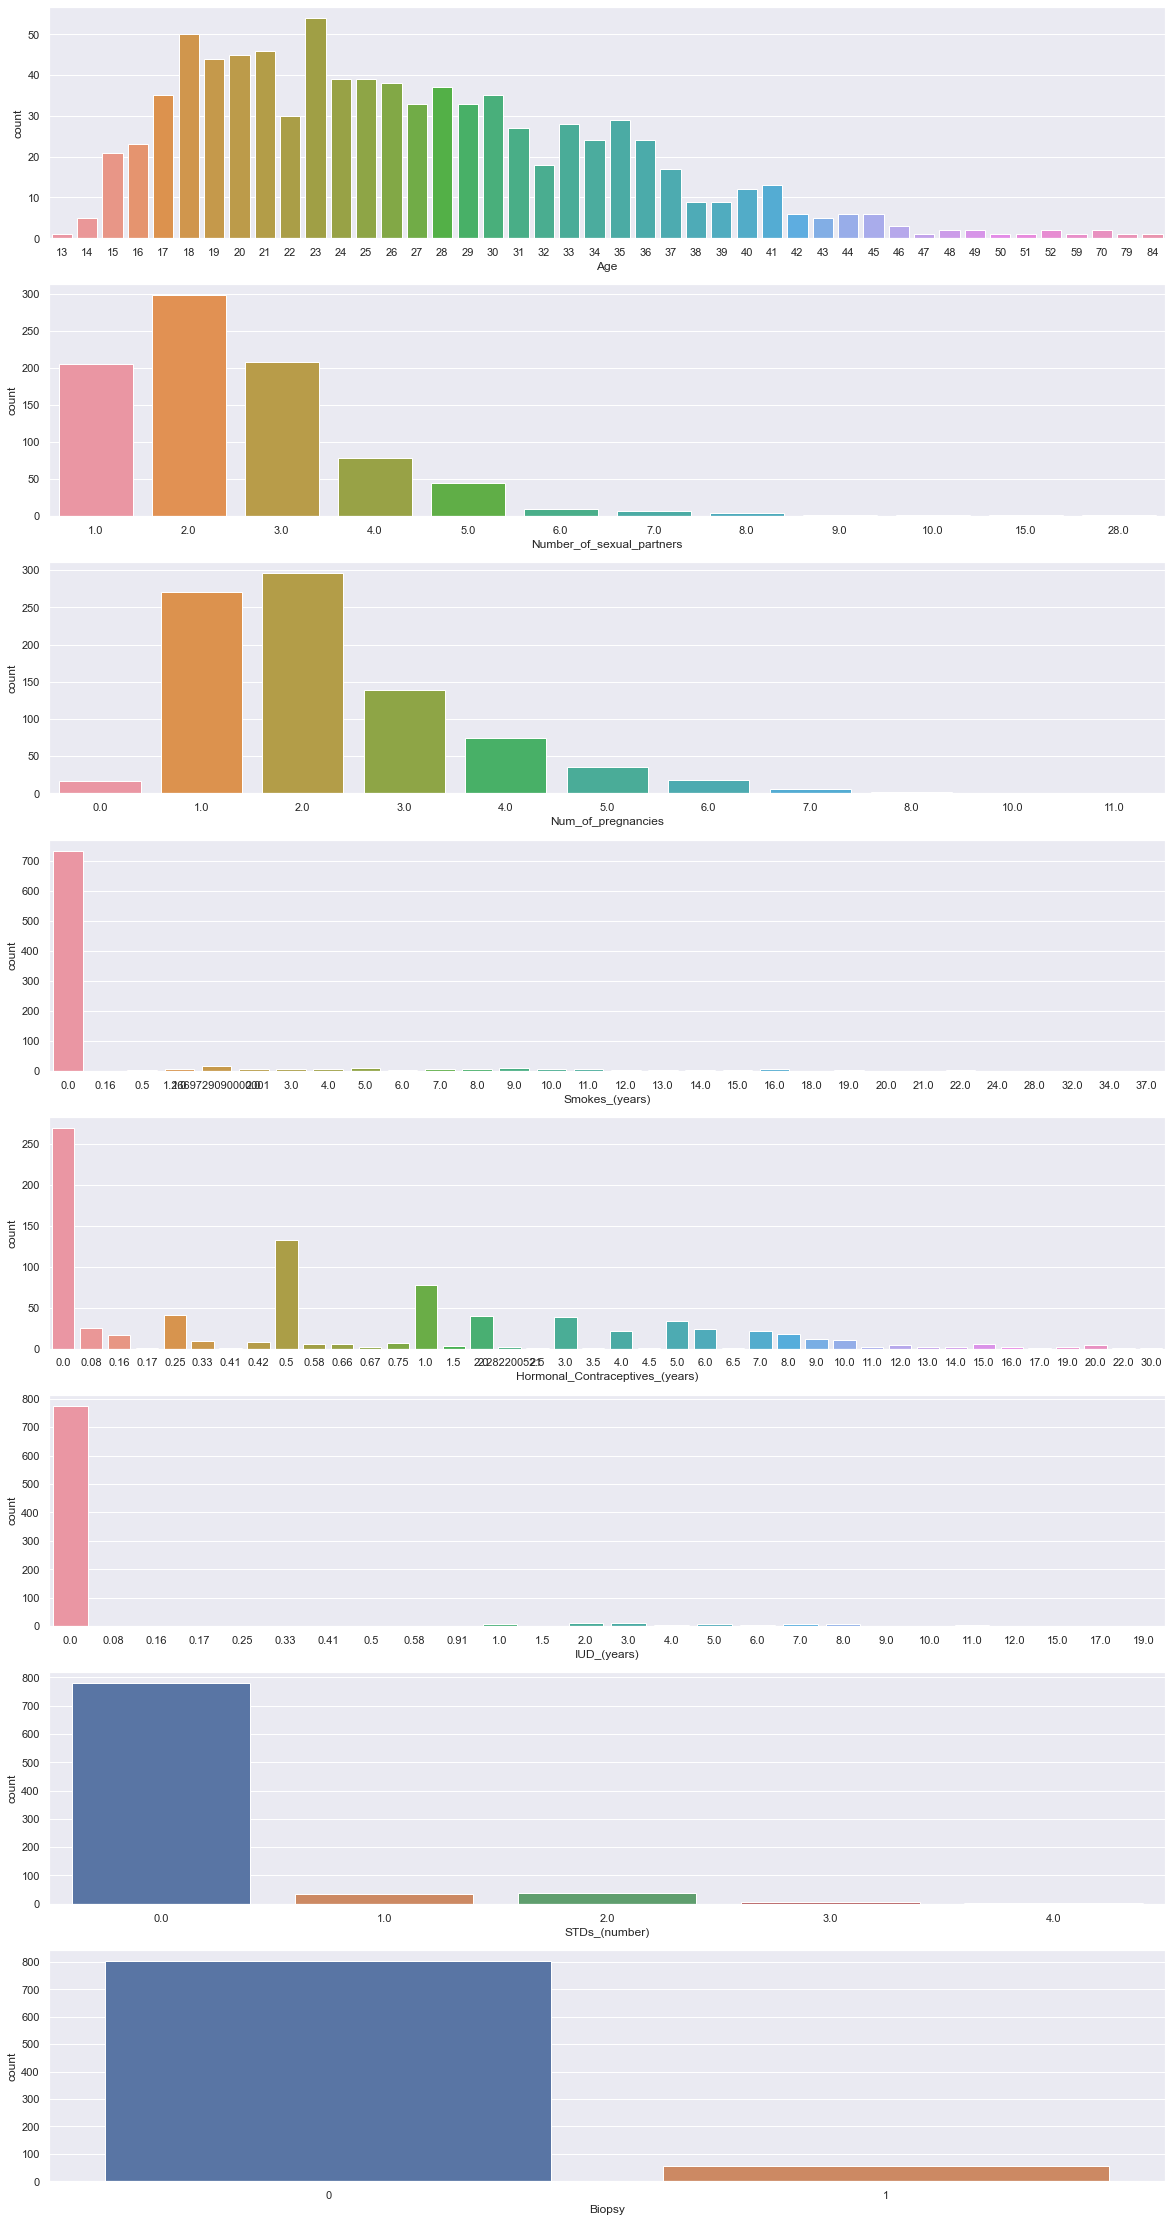

In [37]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(8,1,figsize=(20,40));
sns.countplot(x='Age', data=df, ax=ax1);
sns.countplot(x='Number_of_sexual_partners', data=df, ax=ax2);
sns.countplot(x='Num_of_pregnancies', data=df, ax=ax3);
sns.countplot(x='Smokes_(years)', data=df, ax=ax4);
sns.countplot(x='Hormonal_Contraceptives_(years)', data=df, ax=ax5);
sns.countplot(x='IUD_(years)', data=df, ax=ax6);
sns.countplot(x='STDs_(number)', data=df, ax=ax7);
sns.countplot(x='Biopsy', data=df, ax=ax8);

###### Taking a closer look at Age feature

we can see that women age 20 -35 are facing the higher risk of cervical cancer. women age 50 face some level of risk as well.
We csan also see from the dansity map that women that had their first sexual intercourse before the age of 20 face some risk as well

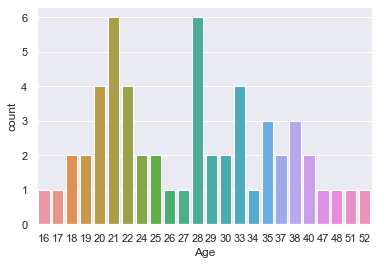

In [19]:
filt = (df['Biopsy'] == 1)
sns.countplot(x='Age', data=df.loc[filt, ['Age']]);

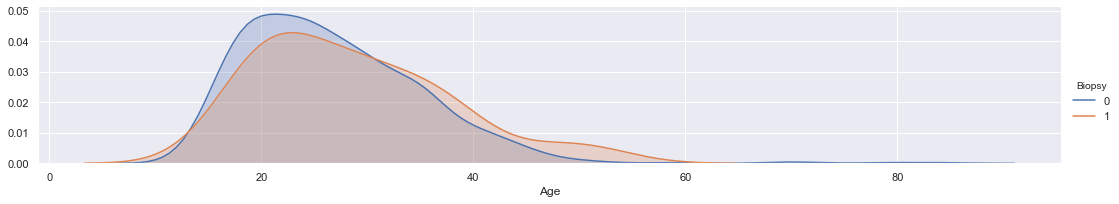

In [20]:
dns= sns.FacetGrid(df,hue='Biopsy',aspect=5)

dns.map(sns.kdeplot,'Age',shade=True)

dns.add_legend();

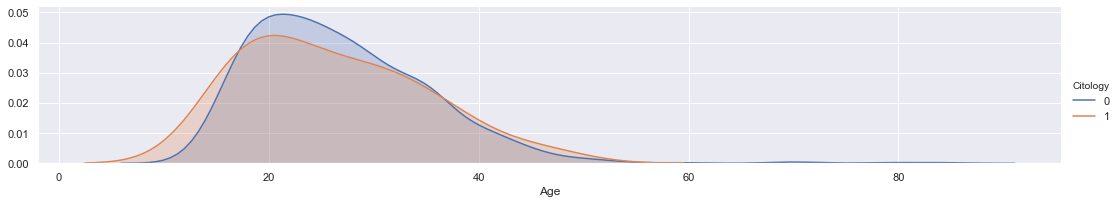

In [21]:
dns= sns.FacetGrid(df,hue='Citology',aspect=5)

dns.map(sns.kdeplot,'Age',shade=True)

dns.add_legend();

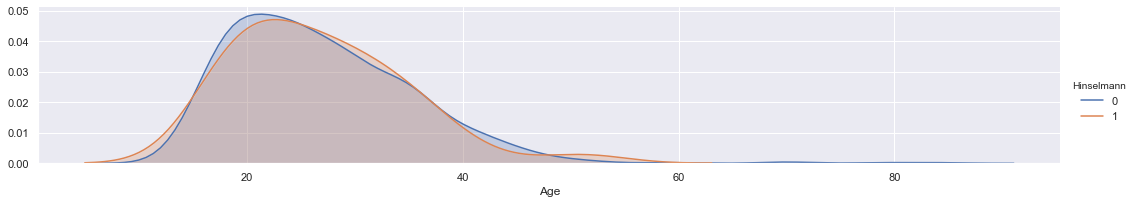

In [22]:
dns= sns.FacetGrid(df,hue='Hinselmann',aspect=5)

dns.map(sns.kdeplot,'Age',shade=True)

dns.add_legend();

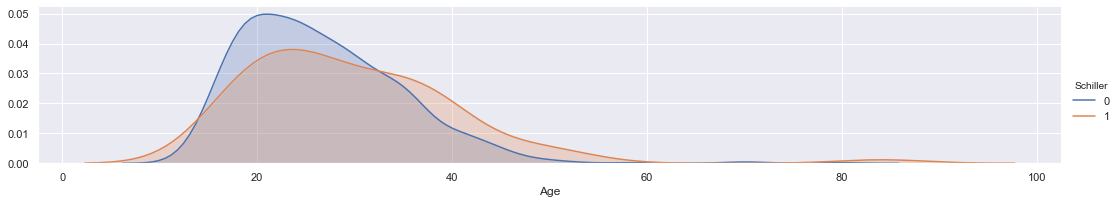

In [23]:
dns= sns.FacetGrid(df,hue='Schiller',aspect=5)

dns.map(sns.kdeplot,'Age',shade=True)

dns.add_legend();

According to the above plots - Women age 20 - 35 at highest risk

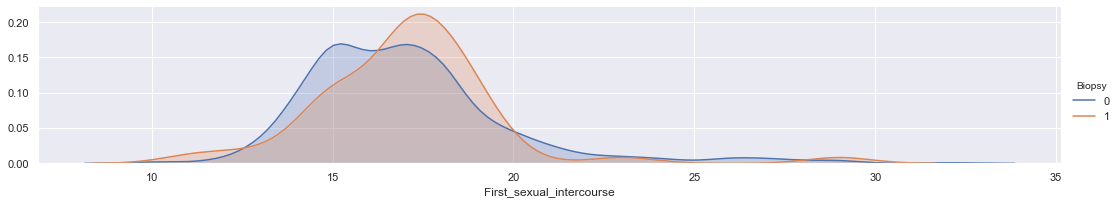

In [24]:
dns= sns.FacetGrid(df,hue='Biopsy',aspect=5)

dns.map(sns.kdeplot,'First_sexual_intercourse',shade=True)

dns.add_legend();

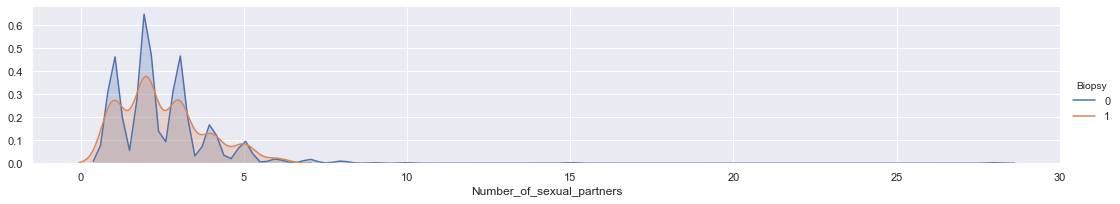

In [25]:
dns= sns.FacetGrid(df,hue='Biopsy',aspect=5)

dns.map(sns.kdeplot,'Number_of_sexual_partners',shade=True)

dns.add_legend();

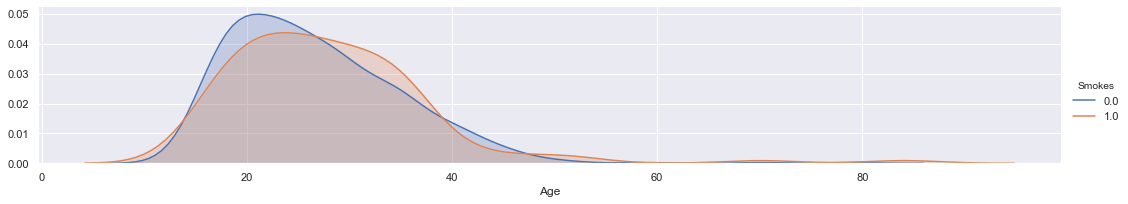

In [26]:
dns= sns.FacetGrid(df,hue='Smokes',aspect=5)

dns.map(sns.kdeplot,'Age',shade=True)

dns.add_legend();

###### Now I'll check the outliers in the data

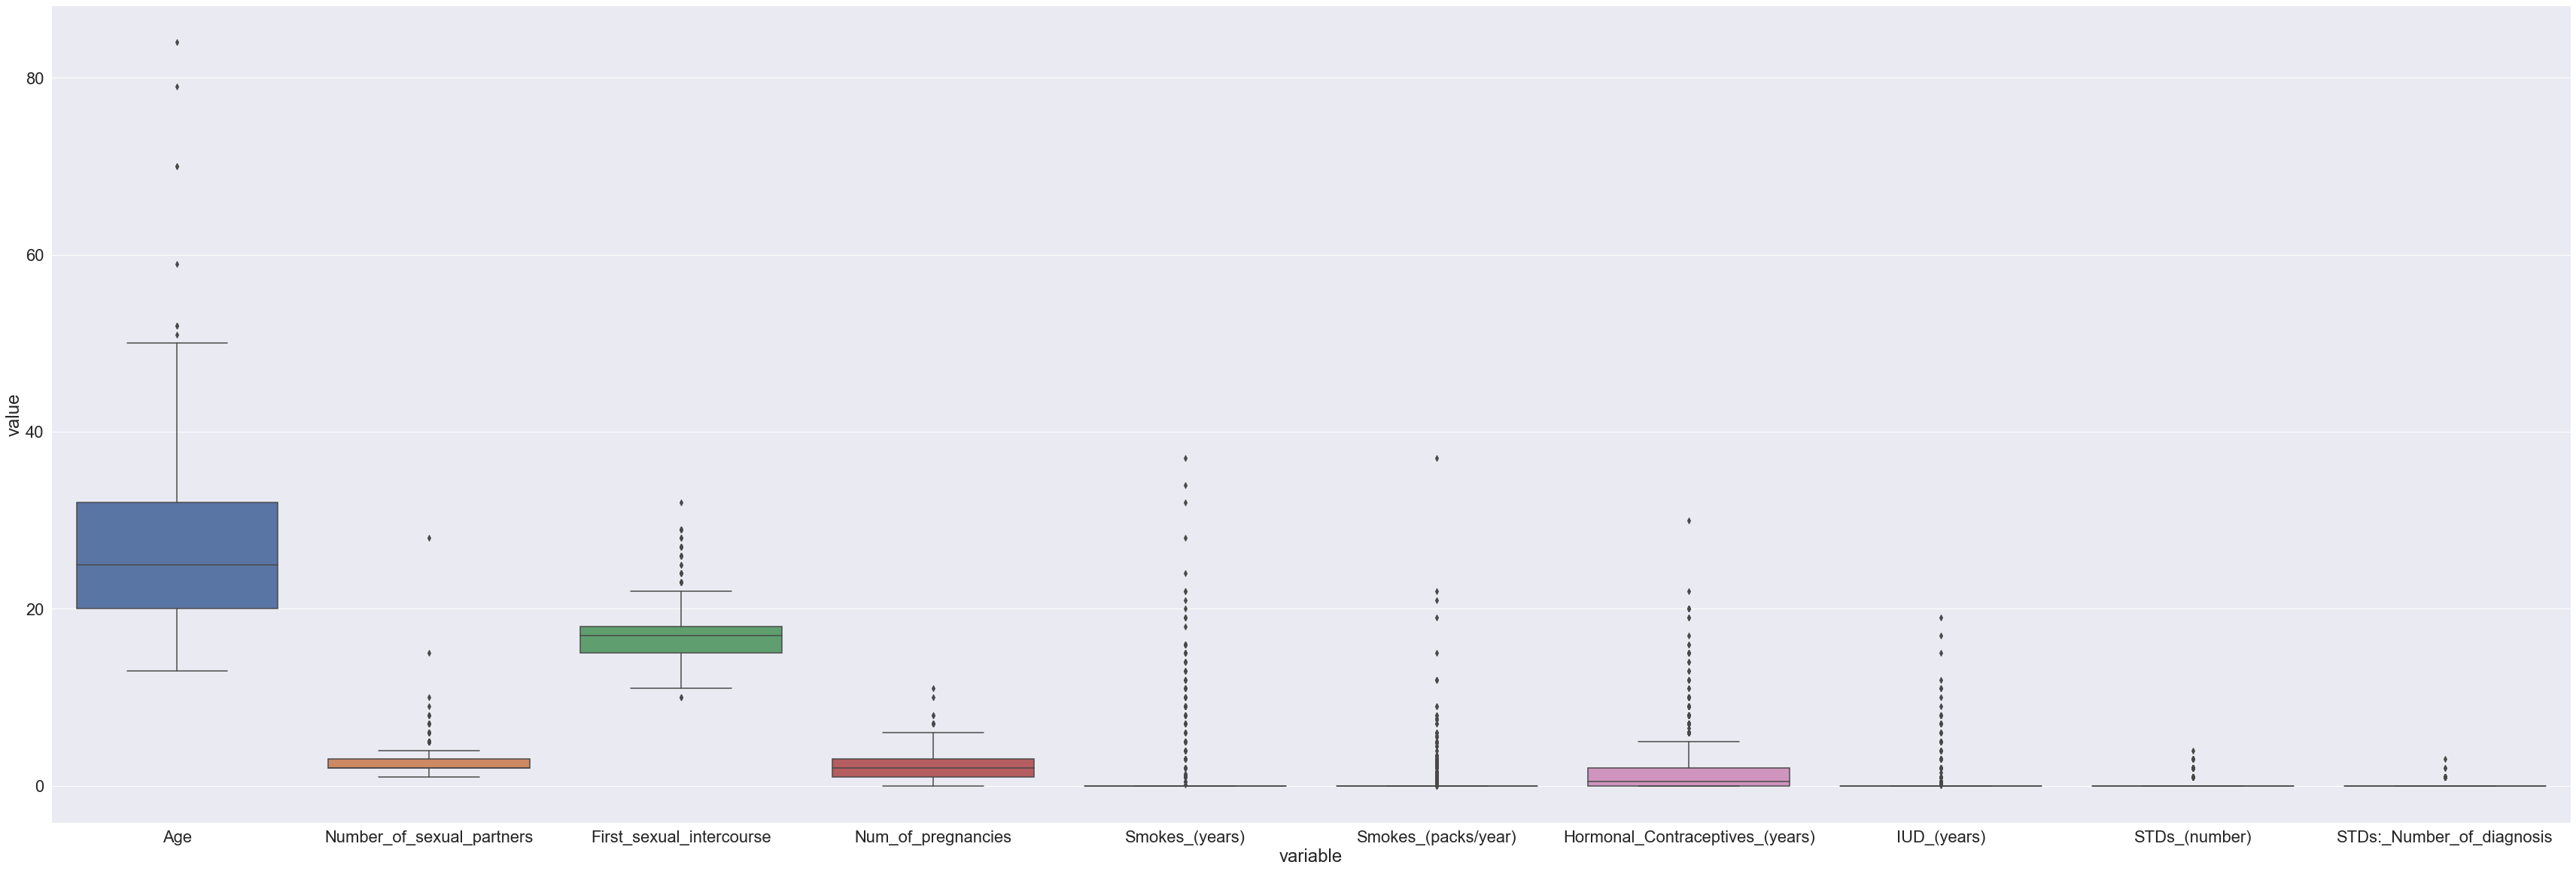

In [27]:
nonBinary=[]
for feature in df.keys():
        if len(df[feature].unique()) > 2 :
                nonBinary.append(feature)


sns.set(style='darkgrid',font_scale=2 )
plt.figure(figsize=(60,20))
sns.boxplot(x="variable", y="value", data=pd.melt(df[nonBinary]));

# Function Definition

###### Show summery report is a function for printing out evaluation metrics

In [38]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 3, wspace = 0.5)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Machine Learning - STEP 1 

###### Defining Predictors (X) and Target (y)

In [65]:
#in the first iteration I'm using all features in the dataset as predictors 
X = df[df.columns.difference(['Biopsy'])]

In [40]:
y=df['Biopsy']

###### Splliting Data 
77% of the data will be used to train the models and rest 33% for testing the models

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Base Model - Logistic Regression 

In [42]:
grid={"C":(1,10,20,30), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
gs_logreg=GridSearchCV(logreg,grid,cv=10)

In [43]:
@ignore_warnings(category=(ConvergenceWarning,FitFailedWarning))
def my_function():
    # Code that triggers the warning
    gs_logreg.fit(X_train,y_train)
    print("tuned hpyerparameters :(best parameters) ",gs_logreg.best_params_)
    print("accuracy :",gs_logreg.best_score_)

    
my_function()   

tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l2'}
accuracy : 0.9477011494252873


In [44]:
logreg=LogisticRegression(C=10, penalty= 'l2',solver='lbfgs')
gs_logreg.fit(X_train,y_train)

/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: Converg

/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': (1, 10, 20, 30), 'penalty': ['l1', 'l2']})

In [45]:
logreg_pred = gs_logreg.predict(X_test)

In [46]:
logreg_loss = log_loss(y_test, gs_logreg.predict_proba(X_test))
logreg_loss

0.13470417019217365

Accuracy : 0.9577 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6875 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6111 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7962                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


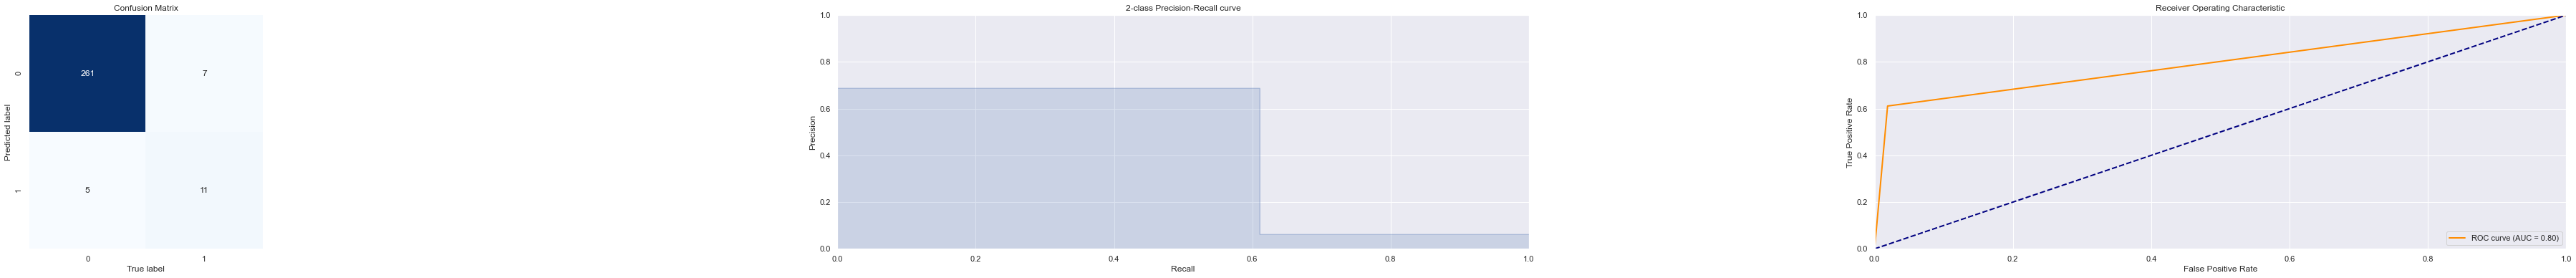

In [47]:
show_summary_report(y_test, logreg_pred);

From the metric evaluation above we can see the logistic regression model didnt perform very well.

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# XGBOOST

using optuna xgboost hyperparmeter tuning 

In [48]:
def objective(trial):
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    param = {
        "silent": 1,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    recall = recall_score(y_test, pred_labels)
    return accuracy
    

In [49]:
study = optuna.create_study()
study.optimize(objective, n_trials=200)

[0]	validation-auc:0.873642
[1]	validation-auc:0.873434
[2]	validation-auc:0.872389
[3]	validation-auc:0.873434
[4]	validation-auc:0.873434
[5]	validation-auc:0.873434
[6]	validation-auc:0.820802
[7]	validation-auc:0.873434
[8]	validation-auc:0.873434
[9]	validation-auc:0.873434


[I 2020-09-12 17:20:30,831] Trial 0 finished with value: 0.9507042253521126 and parameters: {'booster': 'dart', 'lambda': 0.0006733756827698017, 'alpha': 1.6182422849511057e-05, 'max_depth': 4, 'eta': 2.524634191434737e-07, 'gamma': 0.12248162948429923, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.6181356470154196e-06, 'skip_drop': 0.0006350083852352745}. Best is trial 0 with value: 0.9507042253521126.


[0]	validation-auc:0.821637
[1]	validation-auc:0.927736
[2]	validation-auc:0.927736
[3]	validation-auc:0.928571
[4]	validation-auc:0.928571
[5]	validation-auc:0.928571
[6]	validation-auc:0.928571
[7]	validation-auc:0.928571
[8]	validation-auc:0.928571
[9]	validation-auc:0.928571


[I 2020-09-12 17:20:30,937] Trial 1 finished with value: 0.954225352112676 and parameters: {'booster': 'gbtree', 'lambda': 3.0994050634618765e-08, 'alpha': 2.118245182921258e-05, 'max_depth': 2, 'eta': 0.001208471914615906, 'gamma': 1.9807782633133185e-07, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.9507042253521126.


[0]	validation-auc:0.927736
[1]	validation-auc:0.927736
[2]	validation-auc:0.927736
[3]	validation-auc:0.927736
[4]	validation-auc:0.925334
[5]	validation-auc:0.92617
[6]	validation-auc:0.926587
[7]	validation-auc:0.926796
[8]	validation-auc:0.927214
[9]	validation-auc:0.927214


[I 2020-09-12 17:20:31,037] Trial 2 finished with value: 0.9683098591549296 and parameters: {'booster': 'gbtree', 'lambda': 0.0552260787416068, 'alpha': 5.5371542074965375e-05, 'max_depth': 3, 'eta': 9.292990052028237e-05, 'gamma': 3.5526328415814895e-08, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.9507042253521126.


[0]	validation-auc:0.423454
[1]	validation-auc:0.419277
[2]	validation-auc:0.411341
[3]	validation-auc:0.409461
[4]	validation-auc:0.407581
[5]	validation-auc:0.407581
[6]	validation-auc:0.407581
[7]	validation-auc:0.407581
[8]	validation-auc:0.407581
[9]	validation-auc:0.407581


[I 2020-09-12 17:20:31,101] Trial 3 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 1.589845379901909e-07, 'alpha': 0.935154464785254}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.5
[1]	validation-auc:0.63137
[2]	validation-auc:0.86675
[3]	validation-auc:0.86675
[4]	validation-auc:0.86957
[5]	validation-auc:0.872076
[6]	validation-auc:0.871241
[7]	validation-auc:0.872494
[8]	validation-auc:0.872494
[9]	validation-auc:0.874165


[I 2020-09-12 17:20:31,234] Trial 4 finished with value: 0.9507042253521126 and parameters: {'booster': 'gbtree', 'lambda': 0.000145782686639612, 'alpha': 0.10802133812424913, 'max_depth': 6, 'eta': 3.1625499123292876e-08, 'gamma': 0.1306482292828062, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:31,253] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:31,280] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:31,301] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:31,329] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:31,348] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:31,370] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:31,392] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:31,410] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:31,436] Trial 13 pruned. Trial w

[0]	validation-auc:0.423454
[1]	validation-auc:0.421157
[2]	validation-auc:0.412803
[3]	validation-auc:0.410297
[4]	validation-auc:0.407999
[5]	validation-auc:0.407581
[6]	validation-auc:0.407581
[7]	validation-auc:0.407581
[8]	validation-auc:0.407581
[9]	validation-auc:0.407581


[I 2020-09-12 17:20:31,517] Trial 14 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.00011546236231731824, 'alpha': 0.8194057479366121}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.425334
[1]	validation-auc:0.424708
[2]	validation-auc:0.422828
[3]	validation-auc:0.420113
[4]	validation-auc:0.414265
[5]	validation-auc:0.410714
[6]	validation-auc:0.407999
[7]	validation-auc:0.405702
[8]	validation-auc:0.405493
[9]	validation-auc:0.405493


[I 2020-09-12 17:20:31,596] Trial 15 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 1.897823659553743e-05, 'alpha': 0.40957323478121854}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:31,613] Trial 16 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.42429
[1]	validation-auc:0.422619
[2]	validation-auc:0.41886
[3]	validation-auc:0.411341
[4]	validation-auc:0.409461
[5]	validation-auc:0.406955
[6]	validation-auc:0.406955
[7]	validation-auc:0.406955
[8]	validation-auc:0.406955
[9]	validation-auc:0.406955


[I 2020-09-12 17:20:31,697] Trial 17 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.013937548314379423, 'alpha': 0.6707447428959273}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.412072
[1]	validation-auc:0.423141
[2]	validation-auc:0.427109
[3]	validation-auc:0.428363
[4]	validation-auc:0.428363
[5]	validation-auc:0.429407
[6]	validation-auc:0.434002
[7]	validation-auc:0.434419
[8]	validation-auc:0.434628
[9]	validation-auc:0.435464


[I 2020-09-12 17:20:31,778] Trial 18 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.029447597859871433, 'alpha': 0.11387648435246449}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:31,800] Trial 19 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.417502
[1]	validation-auc:0.407477
[2]	validation-auc:0.418755
[3]	validation-auc:0.440058
[4]	validation-auc:0.45802
[5]	validation-auc:0.469507
[6]	validation-auc:0.47619
[7]	validation-auc:0.488722
[8]	validation-auc:0.489975
[9]	validation-auc:0.494361


[I 2020-09-12 17:20:31,883] Trial 20 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.729660816989523, 'alpha': 0.019650809820868646}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:31,908] Trial 21 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.42429
[1]	validation-auc:0.422619
[2]	validation-auc:0.41886
[3]	validation-auc:0.411341
[4]	validation-auc:0.409461
[5]	validation-auc:0.406955
[6]	validation-auc:0.406955
[7]	validation-auc:0.406955
[8]	validation-auc:0.406955
[9]	validation-auc:0.406955


[I 2020-09-12 17:20:31,986] Trial 22 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.013247587924678084, 'alpha': 0.6771778311729669}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.363826
[1]	validation-auc:0.384085
[2]	validation-auc:0.401629
[3]	validation-auc:0.413534
[4]	validation-auc:0.419591
[5]	validation-auc:0.422723
[6]	validation-auc:0.423977
[7]	validation-auc:0.424812
[8]	validation-auc:0.425439
[9]	validation-auc:0.425647


[I 2020-09-12 17:20:32,070] Trial 23 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.8200007806458459, 'alpha': 0.10127006504971138}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.42335


[I 2020-09-12 17:20:32,094] Trial 24 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.423454
[1]	validation-auc:0.419277
[2]	validation-auc:0.411341
[3]	validation-auc:0.409461
[4]	validation-auc:0.407581
[5]	validation-auc:0.407581
[6]	validation-auc:0.407581
[7]	validation-auc:0.407581
[8]	validation-auc:0.407581
[9]	validation-auc:0.407581


[I 2020-09-12 17:20:32,173] Trial 25 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.1734811036741192, 'alpha': 0.9277382098305008}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.37688
[1]	validation-auc:0.397974
[2]	validation-auc:0.411759
[3]	validation-auc:0.415936
[4]	validation-auc:0.418442
[5]	validation-auc:0.416562
[6]	validation-auc:0.412594
[7]	validation-auc:0.40967
[8]	validation-auc:0.407581
[9]	validation-auc:0.404657


[I 2020-09-12 17:20:32,247] Trial 26 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.13472336890872533, 'alpha': 0.2697578712283582}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:32,265] Trial 27 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.422828
[1]	validation-auc:0.41886
[2]	validation-auc:0.410923
[3]	validation-auc:0.409461
[4]	validation-auc:0.407999
[5]	validation-auc:0.407999
[6]	validation-auc:0.407999
[7]	validation-auc:0.407999
[8]	validation-auc:0.407999
[9]	validation-auc:0.407999


[I 2020-09-12 17:20:32,340] Trial 28 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.8086016942537358, 'alpha': 0.9935891762216589}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:32,359] Trial 29 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:32,377] Trial 30 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.384712
[1]	validation-auc:0.406642
[2]	validation-auc:0.414996
[3]	validation-auc:0.417502
[4]	validation-auc:0.416458
[5]	validation-auc:0.412072
[6]	validation-auc:0.409357
[7]	validation-auc:0.406433
[8]	validation-auc:0.404553
[9]	validation-auc:0.404553


[I 2020-09-12 17:20:32,446] Trial 31 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 2.159241321280674e-07, 'alpha': 0.3282567392961334}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:32,465] Trial 32 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:32,495] Trial 33 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:32,517] Trial 34 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:32,553] Trial 35 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.423454
[1]	validation-auc:0.419277
[2]	validation-auc:0.41155
[3]	validation-auc:0.409461
[4]	validation-auc:0.407581
[5]	validation-auc:0.407581
[6]	validation-auc:0.407581
[7]	validation-auc:0.407581
[8]	validation-auc:0.407581
[9]	validation-auc:0.407581


[I 2020-09-12 17:20:32,628] Trial 36 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 1.854073642931094e-08, 'alpha': 0.9090203122640397}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.378446
[1]	validation-auc:0.400585
[2]	validation-auc:0.413325
[3]	validation-auc:0.416249
[4]	validation-auc:0.417711
[5]	validation-auc:0.41604
[6]	validation-auc:0.411654
[7]	validation-auc:0.40873
[8]	validation-auc:0.40518
[9]	validation-auc:0.404553


[I 2020-09-12 17:20:32,709] Trial 37 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.12052210949313881, 'alpha': 0.29427997635466585}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:32,744] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:32,780] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:32,813] Trial 40 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.378237
[1]	validation-auc:0.399958
[2]	validation-auc:0.412907
[3]	validation-auc:0.416249
[4]	validation-auc:0.41792
[5]	validation-auc:0.41604
[6]	validation-auc:0.411028
[7]	validation-auc:0.408312
[8]	validation-auc:0.406015
[9]	validation-auc:0.404553


[I 2020-09-12 17:20:32,894] Trial 41 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 1.1879422654457456e-08, 'alpha': 0.2916355444973259}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:32,913] Trial 42 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.37782
[1]	validation-auc:0.40142
[2]	validation-auc:0.420844
[3]	validation-auc:0.432331
[4]	validation-auc:0.437343
[5]	validation-auc:0.444653
[6]	validation-auc:0.448622
[7]	validation-auc:0.452172
[8]	validation-auc:0.457602
[9]	validation-auc:0.461153


[I 2020-09-12 17:20:32,999] Trial 43 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.5861506599024241, 'alpha': 0.042503473814609755}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:33,020] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,043] Trial 45 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.390142
[1]	validation-auc:0.516291
[2]	validation-auc:0.661236
[3]	validation-auc:0.746867
[4]	validation-auc:0.806182
[5]	validation-auc:0.842732
[6]	validation-auc:0.871345
[7]	validation-auc:0.891395
[8]	validation-auc:0.909983
[9]	validation-auc:0.921888


[I 2020-09-12 17:20:33,119] Trial 46 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.005723774517121221, 'alpha': 0.04391426776396122}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.361738
[1]	validation-auc:0.381161
[2]	validation-auc:0.399541
[3]	validation-auc:0.411654
[4]	validation-auc:0.417293
[5]	validation-auc:0.42147
[6]	validation-auc:0.422932
[7]	validation-auc:0.423559
[8]	validation-auc:0.424394
[9]	validation-auc:0.425021


[I 2020-09-12 17:20:33,196] Trial 47 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.7631666875119683, 'alpha': 0.09549460124951892}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:33,215] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,253] Trial 49 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.422828
[1]	validation-auc:0.41886
[2]	validation-auc:0.410923
[3]	validation-auc:0.409461
[4]	validation-auc:0.407999
[5]	validation-auc:0.407999
[6]	validation-auc:0.407999
[7]	validation-auc:0.407999


[I 2020-09-12 17:20:33,322] Trial 50 pruned. Trial was pruned at iteration 8.
[I 2020-09-12 17:20:33,344] Trial 51 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,363] Trial 52 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,387] Trial 53 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.420844


[I 2020-09-12 17:20:33,410] Trial 54 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.422828
[1]	validation-auc:0.41886
[2]	validation-auc:0.410923
[3]	validation-auc:0.409461
[4]	validation-auc:0.407999
[5]	validation-auc:0.407999
[6]	validation-auc:0.407999
[7]	validation-auc:0.407999


[I 2020-09-12 17:20:33,479] Trial 55 pruned. Trial was pruned at iteration 8.
[I 2020-09-12 17:20:33,497] Trial 56 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,521] Trial 57 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.346491
[1]	validation-auc:0.367586
[2]	validation-auc:0.391186
[3]	validation-auc:0.409148
[4]	validation-auc:0.417502
[5]	validation-auc:0.422306
[6]	validation-auc:0.424185
[7]	validation-auc:0.424394
[8]	validation-auc:0.43066
[9]	validation-auc:0.432331


[I 2020-09-12 17:20:33,598] Trial 58 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 9.516130930016234e-06, 'alpha': 0.062372630948138635}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:33,634] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,662] Trial 60 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.422828
[1]	validation-auc:0.419277
[2]	validation-auc:0.411341
[3]	validation-auc:0.409461
[4]	validation-auc:0.407581
[5]	validation-auc:0.407581
[6]	validation-auc:0.407581
[7]	validation-auc:0.407581
[8]	validation-auc:0.407581
[9]	validation-auc:0.407581


[I 2020-09-12 17:20:33,744] Trial 61 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.9742788312563432, 'alpha': 0.945556282264879}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:33,763] Trial 62 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,786] Trial 63 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,806] Trial 64 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,825] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:33,845] Trial 66 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.375313
[1]	validation-auc:0.396825
[2]	validation-auc:0.410819
[3]	validation-auc:0.415622
[4]	validation-auc:0.41792
[5]	validation-auc:0.41604
[6]	validation-auc:0.412281
[7]	validation-auc:0.409566
[8]	validation-auc:0.407477
[9]	validation-auc:0.404553


[I 2020-09-12 17:20:33,926] Trial 67 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 1.4084428267998112e-08, 'alpha': 0.2674838397336377}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.355681
[1]	validation-auc:0.376566
[2]	validation-auc:0.39599
[3]	validation-auc:0.409566
[4]	validation-auc:0.417293
[5]	validation-auc:0.421261
[6]	validation-auc:0.422723
[7]	validation-auc:0.424185
[8]	validation-auc:0.425021
[9]	validation-auc:0.425647


[I 2020-09-12 17:20:34,008] Trial 68 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.0020529225940850615, 'alpha': 0.10307377507097919}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.403509
[1]	validation-auc:0.420008
[2]	validation-auc:0.425647
[3]	validation-auc:0.428154
[4]	validation-auc:0.428571
[5]	validation-auc:0.432122
[6]	validation-auc:0.434419
[7]	validation-auc:0.435046
[8]	validation-auc:0.436508
[9]	validation-auc:0.437552


[I 2020-09-12 17:20:34,089] Trial 69 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.0002839890123398298, 'alpha': 0.10137558871850677}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:34,124] Trial 70 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.354845
[1]	validation-auc:0.379073
[2]	validation-auc:0.398496
[3]	validation-auc:0.409774
[4]	validation-auc:0.418129
[5]	validation-auc:0.422932
[6]	validation-auc:0.424603
[7]	validation-auc:0.425856
[8]	validation-auc:0.426065
[9]	validation-auc:0.425856


[I 2020-09-12 17:20:34,214] Trial 71 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.00029786050618596456, 'alpha': 0.08800650182909382}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.387218
[1]	validation-auc:0.407477
[2]	validation-auc:0.420426
[3]	validation-auc:0.42523
[4]	validation-auc:0.428363
[5]	validation-auc:0.431078
[6]	validation-auc:0.434419
[7]	validation-auc:0.436717
[8]	validation-auc:0.438805
[9]	validation-auc:0.439432


[I 2020-09-12 17:20:34,297] Trial 72 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.1432619378720135, 'alpha': 0.06369135625328323}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:34,321] Trial 73 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,340] Trial 74 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.376566
[1]	validation-auc:0.398496
[2]	validation-auc:0.411863
[3]	validation-auc:0.416249
[4]	validation-auc:0.417711
[5]	validation-auc:0.415622
[6]	validation-auc:0.411654
[7]	validation-auc:0.40873
[8]	validation-auc:0.406224
[9]	validation-auc:0.404553


[I 2020-09-12 17:20:34,423] Trial 75 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.027934222529129707, 'alpha': 0.2786681576609249}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.383459
[1]	validation-auc:0.404553
[2]	validation-auc:0.414996
[3]	validation-auc:0.417711
[4]	validation-auc:0.41792
[5]	validation-auc:0.414578
[6]	validation-auc:0.410819
[7]	validation-auc:0.408312
[8]	validation-auc:0.404971
[9]	validation-auc:0.404553


[I 2020-09-12 17:20:34,502] Trial 76 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.4908526368040821, 'alpha': 0.30547703755072964}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:34,540] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,563] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,593] Trial 79 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.35401
[1]	validation-auc:0.37594
[2]	validation-auc:0.396825
[3]	validation-auc:0.409566
[4]	validation-auc:0.418755
[5]	validation-auc:0.422932
[6]	validation-auc:0.42523
[7]	validation-auc:0.428989
[8]	validation-auc:0.431913
[9]	validation-auc:0.433584


[I 2020-09-12 17:20:34,672] Trial 80 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.1336911909463225, 'alpha': 0.059032218142144544}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:34,692] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,713] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,731] Trial 83 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,752] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,778] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,806] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,831] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,870] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:34,899] Trial 89 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.375627
[1]	validation-auc:0.395468
[2]	validation-auc:0.410088
[3]	validation-auc:0.416145
[4]	validation-auc:0.418442
[5]	validation-auc:0.417607
[6]	validation-auc:0.4151
[7]	validation-auc:0.412176
[8]	validation-auc:0.40967
[9]	validation-auc:0.405702


[I 2020-09-12 17:20:34,985] Trial 90 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.05988983410600504, 'alpha': 0.24837001561377414}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.374687
[1]	validation-auc:0.391813
[2]	validation-auc:0.407895
[3]	validation-auc:0.415414
[4]	validation-auc:0.417711
[5]	validation-auc:0.418755
[6]	validation-auc:0.417502
[7]	validation-auc:0.413116
[8]	validation-auc:0.411028
[9]	validation-auc:0.408939


[I 2020-09-12 17:20:35,072] Trial 91 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.05717473960085459, 'alpha': 0.2248951955077789}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:35,096] Trial 92 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,115] Trial 93 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,140] Trial 94 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,165] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,188] Trial 96 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.350668
[1]	validation-auc:0.365915
[2]	validation-auc:0.38325
[3]	validation-auc:0.403091
[4]	validation-auc:0.41604
[5]	validation-auc:0.420008
[6]	validation-auc:0.423977
[7]	validation-auc:0.42878
[8]	validation-auc:0.43066
[9]	validation-auc:0.434002


[I 2020-09-12 17:20:35,267] Trial 97 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.0362895992027908, 'alpha': 0.05998458008791313}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:35,300] Trial 98 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,320] Trial 99 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,341] Trial 100 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,360] Trial 101 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,378] Trial 102 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,402] Trial 103 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,425] Trial 104 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,448] Trial 105 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,471] Trial 106 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,492] Trial 107 pruned. Trial was pruned at

[0]	validation-auc:0.376044
[1]	validation-auc:0.397556
[2]	validation-auc:0.41155
[3]	validation-auc:0.415936
[4]	validation-auc:0.418024
[5]	validation-auc:0.416145
[6]	validation-auc:0.412385
[7]	validation-auc:0.409879
[8]	validation-auc:0.407373
[9]	validation-auc:0.404657


[I 2020-09-12 17:20:35,595] Trial 108 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.02788411406192082, 'alpha': 0.27077304318963646}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.38325
[1]	validation-auc:0.404135
[2]	validation-auc:0.414996
[3]	validation-auc:0.416249
[4]	validation-auc:0.41604
[5]	validation-auc:0.412072
[6]	validation-auc:0.409148
[7]	validation-auc:0.406433
[8]	validation-auc:0.404553
[9]	validation-auc:0.404553


[I 2020-09-12 17:20:35,678] Trial 109 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.024616135336149543, 'alpha': 0.31724892506305663}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:35,702] Trial 110 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,725] Trial 111 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,744] Trial 112 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,769] Trial 113 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,796] Trial 114 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,820] Trial 115 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,845] Trial 116 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,886] Trial 117 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,909] Trial 118 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:35,933] Trial 119 pruned. Trial was prun

[0]	validation-auc:0.384294
[1]	validation-auc:0.406642
[2]	validation-auc:0.420008
[3]	validation-auc:0.424812
[4]	validation-auc:0.427527
[5]	validation-auc:0.431078
[6]	validation-auc:0.434002
[7]	validation-auc:0.43609
[8]	validation-auc:0.437761
[9]	validation-auc:0.439223


[I 2020-09-12 17:20:36,075] Trial 123 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.6541364156003933, 'alpha': 0.05495065177650305}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:36,096] Trial 124 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.377402
[1]	validation-auc:0.399749
[2]	validation-auc:0.419591
[3]	validation-auc:0.431913
[4]	validation-auc:0.437552
[5]	validation-auc:0.445071
[6]	validation-auc:0.449248
[7]	validation-auc:0.45259
[8]	validation-auc:0.457185
[9]	validation-auc:0.459064


[I 2020-09-12 17:20:36,175] Trial 125 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.335117509116018, 'alpha': 0.0455564881695209}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:36,194] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,227] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,248] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,273] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,298] Trial 130 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,321] Trial 131 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,340] Trial 132 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.364035
[1]	validation-auc:0.384712
[2]	validation-auc:0.402047
[3]	validation-auc:0.413534
[4]	validation-auc:0.419591
[5]	validation-auc:0.421679
[6]	validation-auc:0.422723
[7]	validation-auc:0.42335
[8]	validation-auc:0.423559
[9]	validation-auc:0.42335


[I 2020-09-12 17:20:36,415] Trial 133 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.17594721350381318, 'alpha': 0.14349335284535447}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:36,439] Trial 134 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,459] Trial 135 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,483] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,502] Trial 137 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,523] Trial 138 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,547] Trial 139 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,567] Trial 140 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,587] Trial 141 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,608] Trial 142 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,626] Trial 143 pruned. Trial was prune

[0]	validation-auc:0.375627
[1]	validation-auc:0.393588
[2]	validation-auc:0.409252
[3]	validation-auc:0.415727
[4]	validation-auc:0.418024
[5]	validation-auc:0.418651
[6]	validation-auc:0.416771
[7]	validation-auc:0.412594
[8]	validation-auc:0.40967
[9]	validation-auc:0.407373


[I 2020-09-12 17:20:36,841] Trial 149 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.07572507405153846, 'alpha': 0.2341049293597702}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:36,863] Trial 150 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,885] Trial 151 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,909] Trial 152 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,934] Trial 153 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:36,952] Trial 154 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.380535
[1]	validation-auc:0.402047
[2]	validation-auc:0.416249
[3]	validation-auc:0.42523
[4]	validation-auc:0.428154
[5]	validation-auc:0.432331
[6]	validation-auc:0.434837
[7]	validation-auc:0.438179
[8]	validation-auc:0.439432
[9]	validation-auc:0.440894


[I 2020-09-12 17:20:37,033] Trial 155 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.17275189417005415, 'alpha': 0.051882592746625975}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:37,055] Trial 156 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,077] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,102] Trial 158 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.365706
[1]	validation-auc:0.385129
[2]	validation-auc:0.400376
[3]	validation-auc:0.41249
[4]	validation-auc:0.416249
[5]	validation-auc:0.419382
[6]	validation-auc:0.420008
[7]	validation-auc:0.420217
[8]	validation-auc:0.419173
[9]	validation-auc:0.417711


[I 2020-09-12 17:20:37,183] Trial 159 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.04063696300915235, 'alpha': 0.16222154466665176}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:37,220] Trial 160 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,242] Trial 161 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,265] Trial 162 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.374165
[1]	validation-auc:0.396721
[2]	validation-auc:0.411759
[3]	validation-auc:0.416771
[4]	validation-auc:0.419069
[5]	validation-auc:0.418651
[6]	validation-auc:0.416562
[7]	validation-auc:0.411967
[8]	validation-auc:0.40967
[9]	validation-auc:0.406119


[I 2020-09-12 17:20:37,344] Trial 163 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.05710685010729083, 'alpha': 0.255659430663563}. Best is trial 3 with value: 0.9366197183098591.


[0]	validation-auc:0.38137
[1]	validation-auc:0.403926
[2]	validation-auc:0.41604
[3]	validation-auc:0.420217
[4]	validation-auc:0.422723
[5]	validation-auc:0.424185
[6]	validation-auc:0.424812
[7]	validation-auc:0.425439
[8]	validation-auc:0.425647
[9]	validation-auc:0.425647


[I 2020-09-12 17:20:37,420] Trial 164 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 1.1094272102698442e-05, 'alpha': 0.11665447278806886}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:37,440] Trial 165 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,458] Trial 166 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,475] Trial 167 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,492] Trial 168 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,510] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,531] Trial 170 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,551] Trial 171 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,575] Trial 172 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,596] Trial 173 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:37,616] Trial 174 pruned. Trial was pr

[0]	validation-auc:0.354219
[1]	validation-auc:0.374687
[2]	validation-auc:0.394737
[3]	validation-auc:0.407686
[4]	validation-auc:0.415205
[5]	validation-auc:0.420844
[6]	validation-auc:0.421679
[7]	validation-auc:0.42335
[8]	validation-auc:0.424394
[9]	validation-auc:0.425439


[I 2020-09-12 17:20:37,848] Trial 183 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.00035655115810904786, 'alpha': 0.08685367673444545}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:37,868] Trial 184 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.377402
[1]	validation-auc:0.398287
[2]	validation-auc:0.411863
[3]	validation-auc:0.416249
[4]	validation-auc:0.417084
[5]	validation-auc:0.415414
[6]	validation-auc:0.411028
[7]	validation-auc:0.408312
[8]	validation-auc:0.405806
[9]	validation-auc:0.404553


[I 2020-09-12 17:20:37,941] Trial 185 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.04432846519753125, 'alpha': 0.28257947084623514}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:37,963] Trial 186 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,003] Trial 187 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,025] Trial 188 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,045] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,065] Trial 190 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,086] Trial 191 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,106] Trial 192 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,126] Trial 193 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.359231
[1]	validation-auc:0.378864
[2]	validation-auc:0.398496
[3]	validation-auc:0.411445
[4]	validation-auc:0.417502
[5]	validation-auc:0.421261
[6]	validation-auc:0.422515
[7]	validation-auc:0.423559
[8]	validation-auc:0.424185
[9]	validation-auc:0.424603


[I 2020-09-12 17:20:38,197] Trial 194 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.25131475836326267, 'alpha': 0.10660060978227498}. Best is trial 3 with value: 0.9366197183098591.
[I 2020-09-12 17:20:38,219] Trial 195 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,240] Trial 196 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,259] Trial 197 pruned. Trial was pruned at iteration 0.
[I 2020-09-12 17:20:38,283] Trial 198 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.374896
[1]	validation-auc:0.393693
[2]	validation-auc:0.408312
[3]	validation-auc:0.416667
[4]	validation-auc:0.420426
[5]	validation-auc:0.421679
[6]	validation-auc:0.420844
[7]	validation-auc:0.418546
[8]	validation-auc:0.413534
[9]	validation-auc:0.410401


[I 2020-09-12 17:20:38,351] Trial 199 finished with value: 0.9366197183098591 and parameters: {'booster': 'gblinear', 'lambda': 0.06736247670165123, 'alpha': 0.22128184269927126}. Best is trial 3 with value: 0.9366197183098591.


In [50]:
tree_para = {'max_depth':[2,4,6,10], 'n_estimators':(10, 100, 400)}

In [51]:
gs_xgboost = GridSearchCV(xgb.XGBClassifier({'booster': 'gbtree', 'lambda': 2.1095278675978724e-08, 'alpha': 1.3630014997780588e-06, 'max_depth': 7, 'eta': 0.4668409246460422, 'gamma': 0.001407992068793587, 'grow_policy': 'depthwise'},learning_rate=0.1,objective='binary:logistic'), tree_para, cv=10)

In [53]:
gs_xgboost.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(max_depth={'alpha': 1.3630014997780588e-06,
                                                'booster': 'gbtree',
                                                'eta': 0.4668409246460422,
                                                'gamma': 0.001407992068793587,
                                                'grow_policy': 'depthwise',
                                                'lambda': 2.1095278675978724e-08,
                                                'max_depth': 7}),
             param_grid={'max_depth': [2, 4, 6, 10],
                         'n_estimators': (10, 100, 400)})

In [54]:
xgboost_pred = gs_xgboost.predict(X_test)

In [55]:
xgboost_loss = log_loss(y_test, gs_xgboost.predict_proba(X_test))
xgboost_loss

0.2561146013543639

Accuracy : 0.9648 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6818 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9035                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


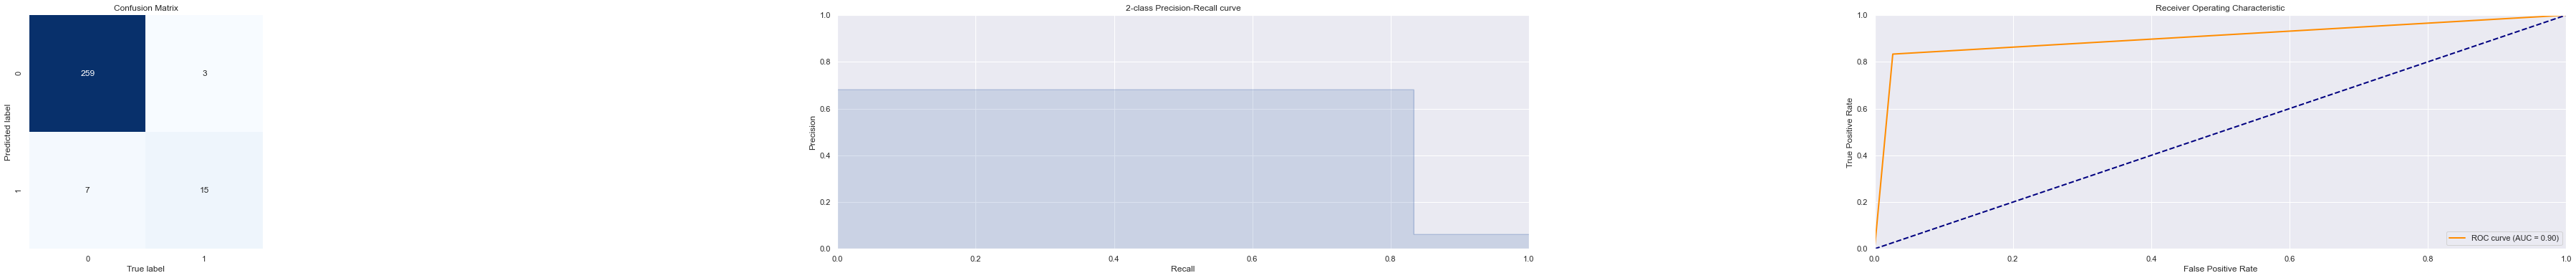

In [56]:
show_summary_report(y_test,xgboost_pred);

xgboost model performed a lot better the the logistic regression model. it had 3 false negative and 7 false positive.

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Rendom Forest

In [47]:
list_trees = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
# Define an objective function to be minimized.
def objective(trial):

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    
    rf_n_estimators = trial.suggest_categorical('rf_n_estimators', list_trees)
    rf_max_features = trial.suggest_uniform('rf_max_features', 0.15, 1.0)
    rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 14)
    rf_min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 14)
    rf_max_samples = trial.suggest_uniform('rf_max_samples', 0.6, 0.99)
    rf_max_depth = trial.suggest_int('rf_max_depth', 10, 100)
    

    
    classifier_obj = RandomForestClassifier(n_estimators=rf_n_estimators,
                             max_features=rf_max_features, min_samples_split=rf_min_samples_split,
                             min_samples_leaf=rf_min_samples_leaf, max_samples=rf_max_samples,max_depth=rf_max_depth,
                             bootstrap=True, n_jobs=-1, verbose=0)

    classifier_obj.fit(X_train, y_train)
    y_pred = classifier_obj.predict(X_test)

    error = mean_squared_error(y_test, y_pred)

    return error  # An objective value linked with the Trial object.



In [48]:
study = optuna.create_study()  # Create a new study.
study.optimize(objective, n_trials=200)  # Invoke optimization of the objective function.

[I 2020-09-01 10:25:47,893] Trial 0 finished with value: 0.02464788732394366 and parameters: {'rf_n_estimators': 75, 'rf_max_features': 0.46100621337282877, 'rf_min_samples_split': 4, 'rf_min_samples_leaf': 7, 'rf_max_samples': 0.7372139394952454, 'rf_max_depth': 79}. Best is trial 0 with value: 0.02464788732394366.
[I 2020-09-01 10:25:48,419] Trial 1 finished with value: 0.045774647887323945 and parameters: {'rf_n_estimators': 200, 'rf_max_features': 0.19786625661303503, 'rf_min_samples_split': 8, 'rf_min_samples_leaf': 3, 'rf_max_samples': 0.8851045175040191, 'rf_max_depth': 83}. Best is trial 0 with value: 0.02464788732394366.
[I 2020-09-01 10:25:48,812] Trial 2 finished with value: 0.035211267605633804 and parameters: {'rf_n_estimators': 125, 'rf_max_features': 0.580099813267852, 'rf_min_samples_split': 10, 'rf_min_samples_leaf': 8, 'rf_max_samples': 0.7805076233606896, 'rf_max_depth': 68}. Best is trial 0 with value: 0.02464788732394366.
[I 2020-09-01 10:25:49,052] Trial 3 finishe

[I 2020-09-01 10:26:08,852] Trial 50 finished with value: 0.03169014084507042 and parameters: {'rf_n_estimators': 75, 'rf_max_features': 0.49161198977695497, 'rf_min_samples_split': 4, 'rf_min_samples_leaf': 7, 'rf_max_samples': 0.6911652414982691, 'rf_max_depth': 20}. Best is trial 0 with value: 0.02464788732394366.
[I 2020-09-01 10:26:09,359] Trial 51 finished with value: 0.03873239436619718 and parameters: {'rf_n_estimators': 150, 'rf_max_features': 0.9704088879641483, 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 6, 'rf_max_samples': 0.8068262022570969, 'rf_max_depth': 59}. Best is trial 0 with value: 0.02464788732394366.
[I 2020-09-01 10:26:09,985] Trial 52 finished with value: 0.028169014084507043 and parameters: {'rf_n_estimators': 200, 'rf_max_features': 0.3602934579691716, 'rf_min_samples_split': 6, 'rf_min_samples_leaf': 5, 'rf_max_samples': 0.7735833460560113, 'rf_max_depth': 45}. Best is trial 0 with value: 0.02464788732394366.
[I 2020-09-01 10:26:10,638] Trial 53 finis

[I 2020-09-01 10:26:34,471] Trial 100 finished with value: 0.06338028169014084 and parameters: {'rf_n_estimators': 175, 'rf_max_features': 0.15346757843788322, 'rf_min_samples_split': 4, 'rf_min_samples_leaf': 4, 'rf_max_samples': 0.6239486983162614, 'rf_max_depth': 36}. Best is trial 0 with value: 0.02464788732394366.
[I 2020-09-01 10:26:34,988] Trial 101 finished with value: 0.028169014084507043 and parameters: {'rf_n_estimators': 175, 'rf_max_features': 0.2680384627573761, 'rf_min_samples_split': 3, 'rf_min_samples_leaf': 5, 'rf_max_samples': 0.7013250940616234, 'rf_max_depth': 61}. Best is trial 0 with value: 0.02464788732394366.
[I 2020-09-01 10:26:35,246] Trial 102 finished with value: 0.028169014084507043 and parameters: {'rf_n_estimators': 50, 'rf_max_features': 0.3995968963293914, 'rf_min_samples_split': 2, 'rf_min_samples_leaf': 6, 'rf_max_samples': 0.7659451198438012, 'rf_max_depth': 40}. Best is trial 0 with value: 0.02464788732394366.
[I 2020-09-01 10:26:35,764] Trial 103 

[I 2020-09-01 10:26:58,531] Trial 150 finished with value: 0.03169014084507042 and parameters: {'rf_n_estimators': 175, 'rf_max_features': 0.31648727793597325, 'rf_min_samples_split': 3, 'rf_min_samples_leaf': 4, 'rf_max_samples': 0.7197022143735943, 'rf_max_depth': 52}. Best is trial 133 with value: 0.02112676056338028.
[I 2020-09-01 10:26:58,903] Trial 151 finished with value: 0.035211267605633804 and parameters: {'rf_n_estimators': 75, 'rf_max_features': 0.3897366801726873, 'rf_min_samples_split': 8, 'rf_min_samples_leaf': 6, 'rf_max_samples': 0.6876141729557801, 'rf_max_depth': 50}. Best is trial 133 with value: 0.02112676056338028.
[I 2020-09-01 10:26:59,553] Trial 152 finished with value: 0.028169014084507043 and parameters: {'rf_n_estimators': 250, 'rf_max_features': 0.36999895387441195, 'rf_min_samples_split': 8, 'rf_min_samples_leaf': 7, 'rf_max_samples': 0.7614840425832334, 'rf_max_depth': 88}. Best is trial 133 with value: 0.02112676056338028.
[I 2020-09-01 10:26:59,937] Tri

In [49]:
tree_para = {'criterion':['gini'], 'n_estimators':(10, 100, 400)}

In [50]:
gs_randomforest = GridSearchCV(RandomForestClassifier({'classifier': 'RandomForest', 'rf_n_estimators': 50, 'rf_max_features': 0.33591194535457014, 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 6, 'rf_max_samples': 0.87921863789084, 'rf_max_depth': 24},random_state=7), tree_para, cv=7)

In [51]:
gs_randomforest.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=RandomForestClassifier(n_estimators={'classifier': 'RandomForest',
                                                            'rf_max_depth': 24,
                                                            'rf_max_features': 0.33591194535457014,
                                                            'rf_max_samples': 0.87921863789084,
                                                            'rf_min_samples_leaf': 6,
                                                            'rf_min_samples_split': 9,
                                                            'rf_n_estimators': 50},
                                              random_state=7),
             param_grid={'criterion': ['gini'], 'n_estimators': (10, 100, 400)})

In [52]:
rendomforest_pred = gs_randomforest.predict(X_test)

In [53]:
randomforest_loss = log_loss(y_test, gs_randomforest.predict_proba(X_test))
randomforest_loss

0.31794225760336275

Accuracy : 0.9472 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6364 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3889 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6869                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


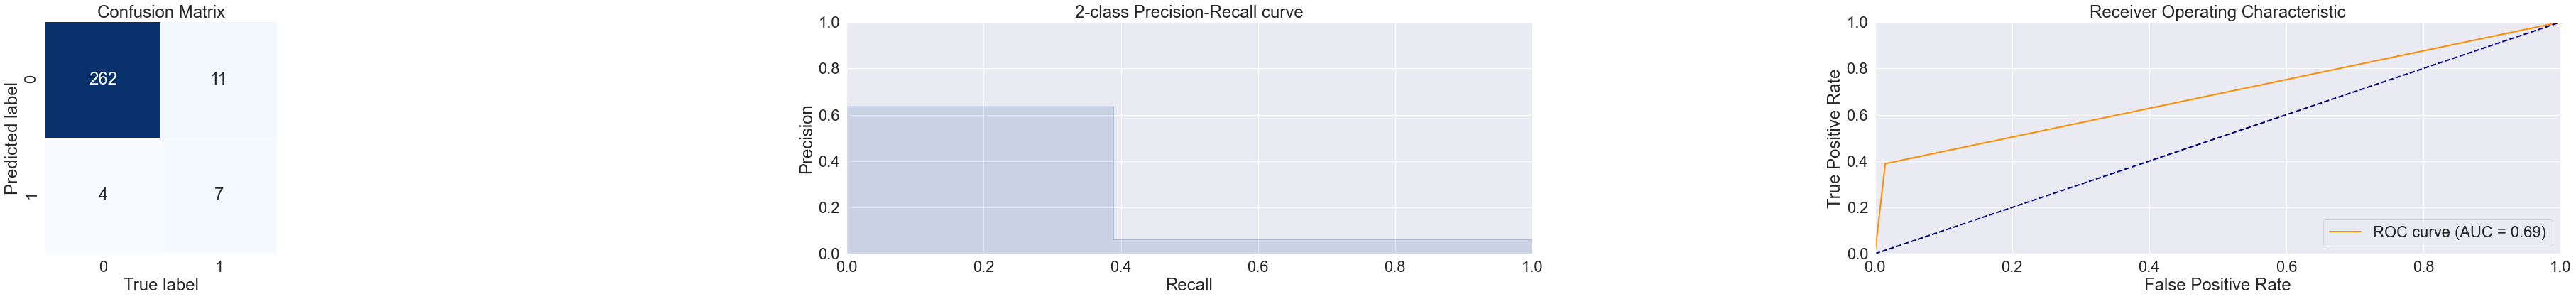

In [54]:
show_summary_report(y_test, rendomforest_pred);

# SVC

In [55]:
svc_param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e10],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1] }
gs_svc = GridSearchCV(
    SVC({'classifier': 'SVC', 'svc_c': 28477.917103503427},kernel='rbf', class_weight='balanced', probability=True), svc_param_grid)



/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass C={'classifier': 'SVC', 'svc_c': 28477.917103503427} as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [56]:
gs_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(C={'classifier': 'SVC', 'svc_c': 28477.917103503427},
                           class_weight='balanced', probability=True),
             param_grid={'C': [1000.0, 5000.0, 10000.0, 50000.0, 10000000000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]})

In [57]:
gs_svc_pred = gs_svc.predict(X_test)

Accuracy : 0.9577 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6364 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7778 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8739                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


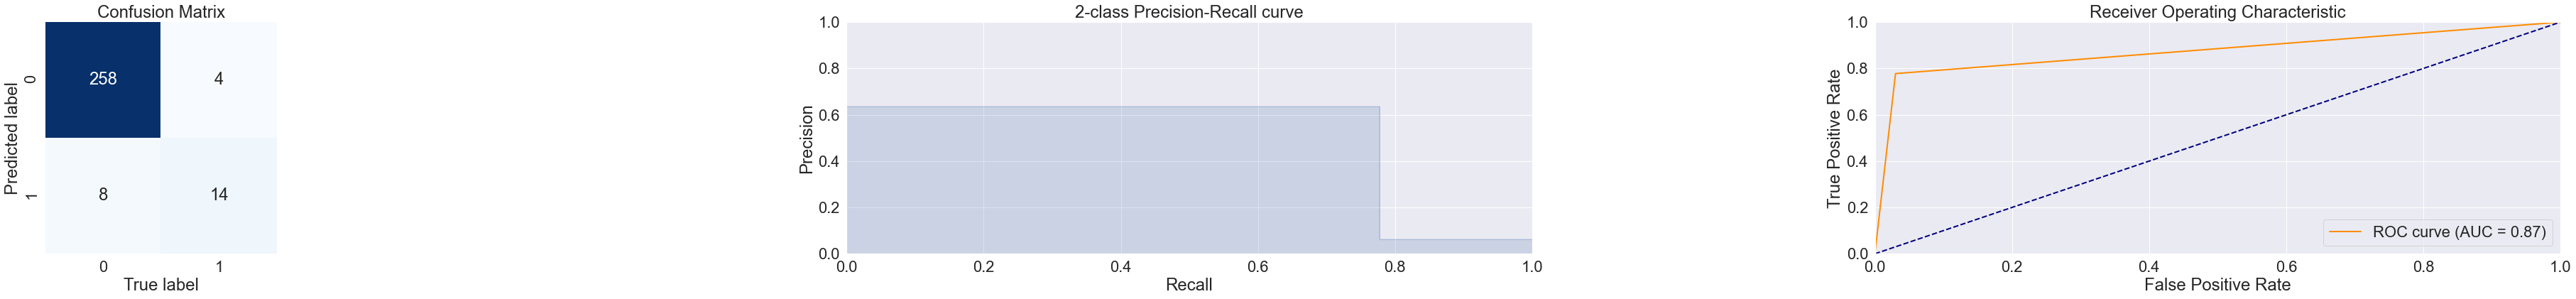

In [58]:
show_summary_report(y_test, gs_svc_pred);

In [59]:
svc_loss = log_loss(y_test, gs_svc.predict_proba(X_test))
svc_loss

0.12897230402245255

After trying Rendom forest and SVC we can see that xgboost performed the best in the first iteration.
Next I'll try SMOTENC to resampler the data and deal the unbalanced nature of it hopefully will see some improvement

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Resample Train Dataset to try and deal with unbalanced data

In [60]:
#Create a list of catagorical columns for SMOTENC.
column_number = 0
catagorical_columns=[]
for feature in df.keys():
        if (len(df[feature].unique()) <= 2) & (feature != 'Biopsy') :
#                print(column_number)
                catagorical_columns.append(column_number)
        column_number+= 1

In [61]:
sm = SMOTENC(random_state=42, categorical_features=catagorical_columns)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

###### XGBOOST with resample dataset

In [62]:
tree_para = {'max_depth':[2,4,6,10], 'n_estimators':(10, 100, 400)}

In [63]:
gs_xgboost_res = GridSearchCV(xgb.XGBClassifier({'booster': 'gbtree', 'lambda': 2.1095278675978724e-08, 'alpha': 1.3630014997780588e-06, 'max_depth': 7, 'eta': 0.4668409246460422, 'gamma': 0.001407992068793587, 'grow_policy': 'depthwise'},learning_rate=0.1,objective='binary:logistic'), tree_para, cv=10)

In [64]:
gs_xgboost_res.fit(X_train_res,y_train_res)

GridSearchCV(cv=10,
             estimator=XGBClassifier(max_depth={'alpha': 1.3630014997780588e-06,
                                                'booster': 'gbtree',
                                                'eta': 0.4668409246460422,
                                                'gamma': 0.001407992068793587,
                                                'grow_policy': 'depthwise',
                                                'lambda': 2.1095278675978724e-08,
                                                'max_depth': 7}),
             param_grid={'max_depth': [2, 4, 6, 10],
                         'n_estimators': (10, 100, 400)})

In [65]:
xgboost_res_pred = gs_xgboost_res.predict(X_test)

Accuracy : 0.9507 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6667 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8183                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


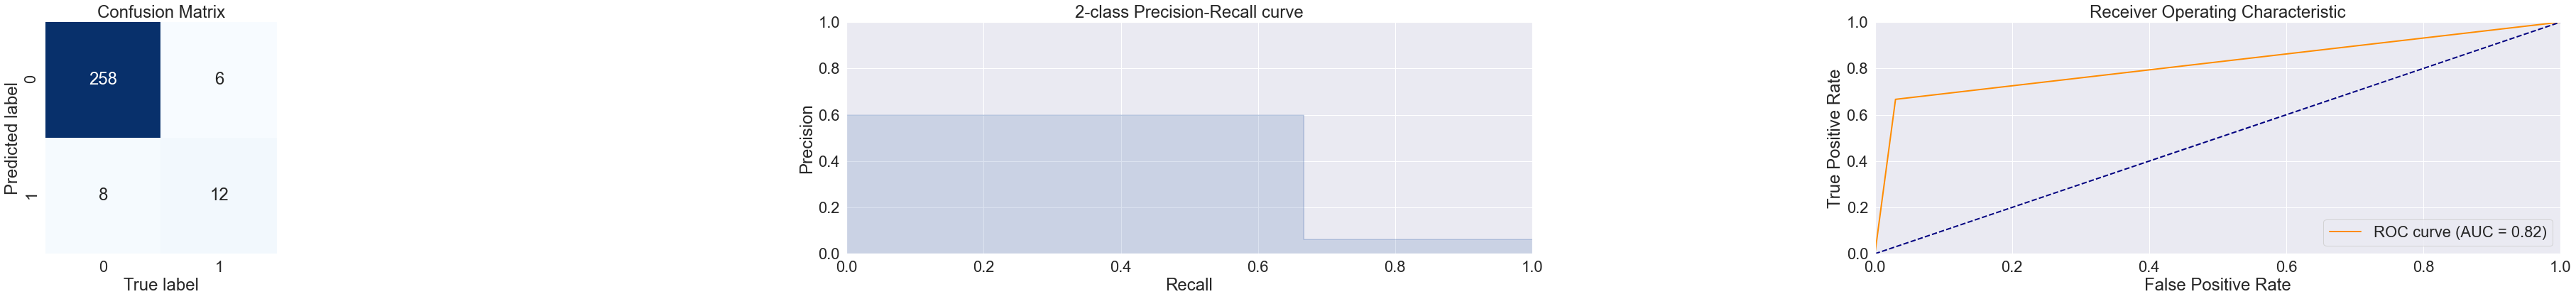

In [66]:
show_summary_report(y_test,xgboost_res_pred);

###### Rendom Forest with resemple dataset

In [67]:
tree_para = {'criterion':['gini'], 'n_estimators':(10, 100, 400)}

In [68]:
gs_randomforest_res = GridSearchCV(RandomForestClassifier({'classifier': 'RandomForest', 'rf_n_estimators': 50, 'rf_max_features': 0.33591194535457014, 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 6, 'rf_max_samples': 0.87921863789084, 'rf_max_depth': 24},random_state=7), tree_para, cv=7)

In [69]:
gs_randomforest_res.fit(X_train_res, y_train_res)

GridSearchCV(cv=7,
             estimator=RandomForestClassifier(n_estimators={'classifier': 'RandomForest',
                                                            'rf_max_depth': 24,
                                                            'rf_max_features': 0.33591194535457014,
                                                            'rf_max_samples': 0.87921863789084,
                                                            'rf_min_samples_leaf': 6,
                                                            'rf_min_samples_split': 9,
                                                            'rf_n_estimators': 50},
                                              random_state=7),
             param_grid={'criterion': ['gini'], 'n_estimators': (10, 100, 400)})

In [70]:
rendomforest_pred = gs_randomforest_res.predict(X_test)

Accuracy : 0.9472 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6364 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.3889 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.6869                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


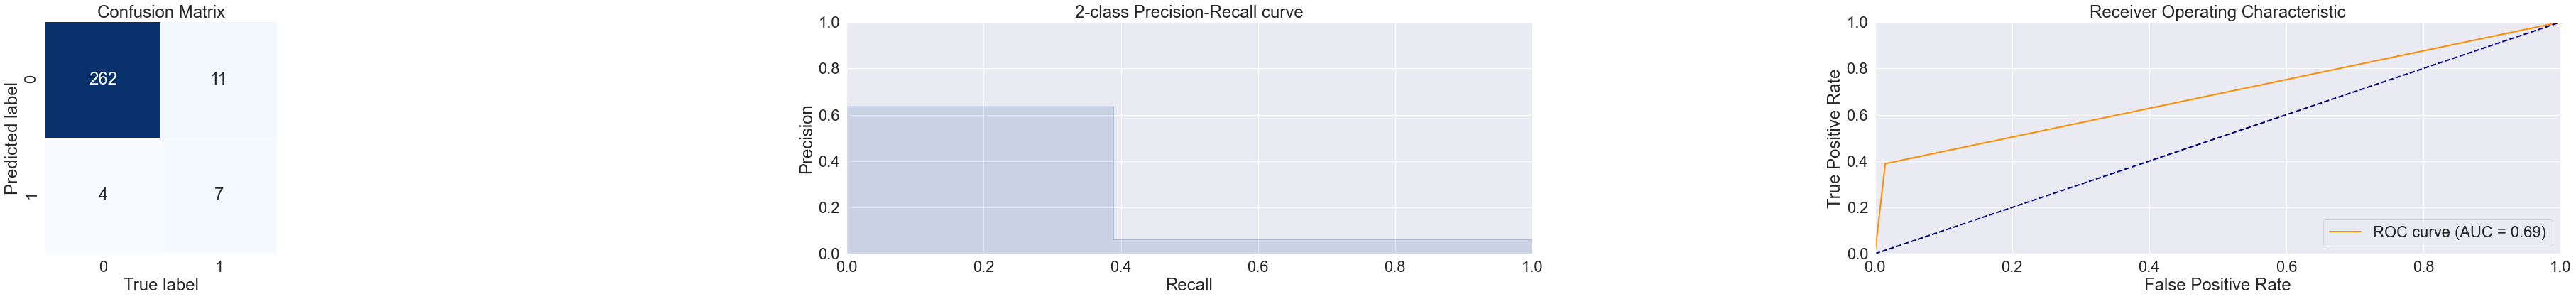

In [71]:
show_summary_report(y_test, rendomforest_pred);

###### Resempling the data didn't help at all. Actually it worsen the results all across the board

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Reviewing the results

In [224]:
sns.set(style='darkgrid',font_scale=4 )
models_results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC', 'LOG_LOSS'])
models = ['Logisic Regression','Random Forest', 'XGboost','SVC']
for i, m in enumerate([gs_logreg ,gs_randomforest, gs_xgboost,gs_svc]):
   
    accuracy_ = accuracy_score(y_test, m.predict(X_test))
    precision_ = precision_score(y_test, m.predict(X_test))
    recall_ = recall_score(y_test, m.predict(X_test))
    roc_auc_ = roc_auc_score(y_test, m.predict(X_test))
    log_loss_ = log_loss(y_test, m.predict_proba(X_test))
    
    # keep the results
    models_results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_,
                       'LOG_LOSS': log_loss_}



In [97]:
models_results

Model  Accuracy  Precision    Recall   ROC_AUC  LOG_LOSS
0  Logisic Regression  0.957746   0.687500  0.611111  0.796157  0.134704
1       Rendom Forest  0.947183   0.636364  0.388889  0.686926  0.317942
2             XGboost  0.964789   0.681818  0.833333  0.903509  0.256115
3                 SVC  0.957746   0.636364  0.777778  0.873851  0.128972

Just looking at the table above we can see that xgboost with the original data is the winner

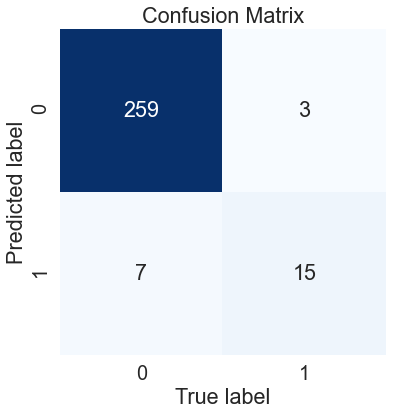

In [57]:
sns.set(style='darkgrid',font_scale=1.8)
mat = confusion_matrix(xgboost_pred,y_test)

fig, ax = plt.subplots(figsize = (6, 6))


    # Confusion Matrix
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax)

ax.set_title('Confusion Matrix');
ax.set_xlabel('True label');
ax.set_ylabel('Predicted label');

Above is the xgboost confution matrix.

In [75]:
# Create a dataframe with features
cols = X_train.columns.values
feature_dataframe = pd.DataFrame({
    'Feature':        cols,
    'Logistic Regression':  gs_logreg.best_estimator_.coef_.reshape(33,),
    'Rendom Forest': gs_randomforest.best_estimator_.feature_importances_,
    'XGBoost':gs_xgboost.best_estimator_.feature_importances_
    
    
})

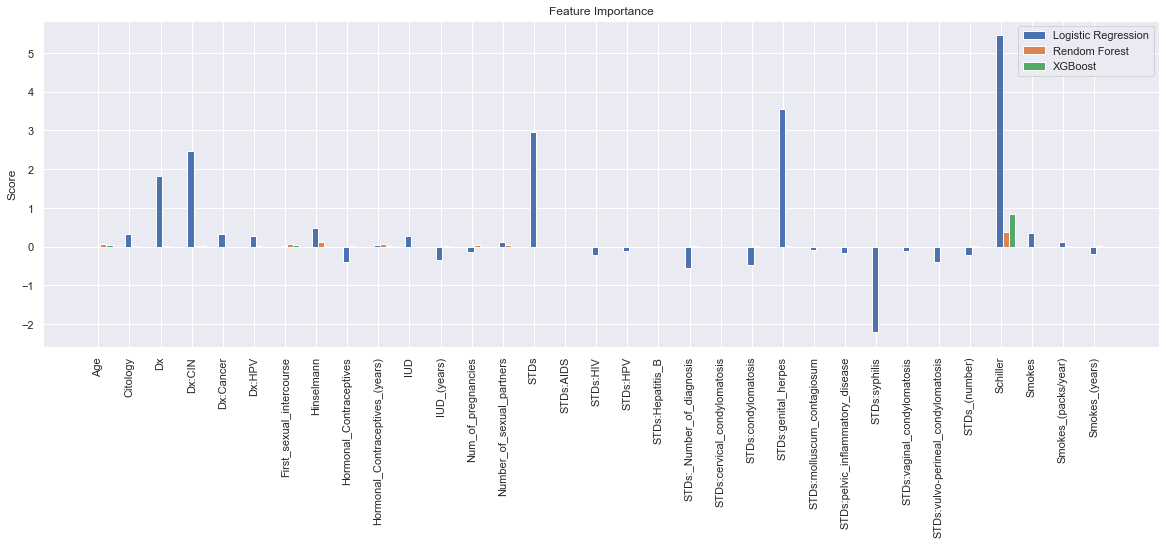

In [227]:
fig = plt.figure(figsize = (20, 6))
sns.set(style='darkgrid',font_scale=1 )
ind = np.arange(len(cols)) 
width = 0.2

for i, m in enumerate(feature_dataframe.columns[1:]):
    plt.bar(ind + ((i  - width) * width), feature_dataframe[m], width, label = m)
    
plt.title('Feature Importance')
plt.xticks(ind, cols, rotation = 90)
plt.ylabel('Score')
plt.legend()
plt.show()

In the feature importance plot above we can see that Schiller's test is the stroingest predictor.

To further analyse the results I used SHAP a state of the art game theoretic approach to explain the output of any machine learning model.
Its goal is to explain the prediction by computing the contribution of each feature to the prediction.
We can see that only 5 features contributed to the prediction. 
Schiller’s test, DX:Cin, Age, Hormonal Contraceptives And first sexual intercourse.

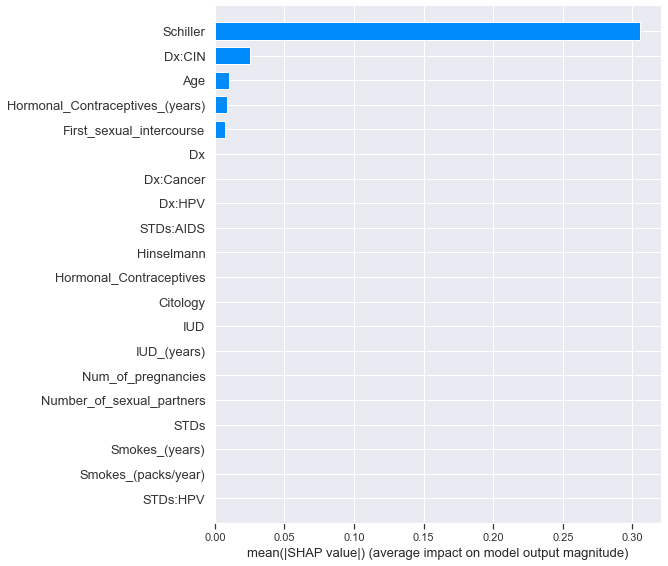

In [77]:
shap_values = shap.TreeExplainer(gs_xgboost.best_estimator_).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

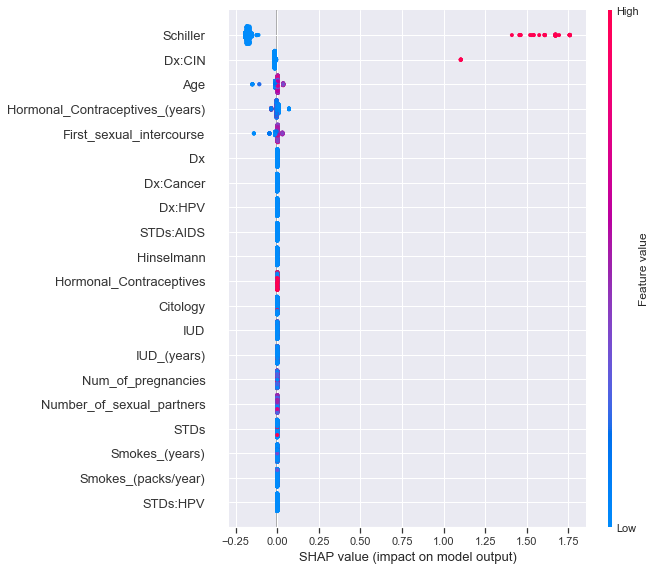

In [78]:
shap_values = shap.TreeExplainer(gs_xgboost.best_estimator_).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [79]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(gs_xgboost.best_estimator_)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)



In [32]:
#visualising Java
shap.initjs()

In [60]:
explainerModel = shap.TreeExplainer(gs_xgboost.best_estimator_)
shap_values_Model = explainerModel.shap_values(X_test)

In [61]:
X_test[X_test['Schiller']==1].head()

Age  Citology  Dx  Dx:CIN  Dx:Cancer  Dx:HPV  First_sexual_intercourse  \
96    35         1   0       0          0       0                      11.0   
23    40         0   0       0          1       1                      20.0   
669   38         0   1       0          1       1                      22.0   
704   41         0   0       0          0       0                      16.0   
668   84         0   0       0          0       0                      20.0   

     Hinselmann  Hormonal_Contraceptives  Hormonal_Contraceptives_(years)  \
96            1                      1.0                             14.0   
23            1                      1.0                             15.0   
669           0                      1.0                              3.0   
704           0                      0.0                              0.0   
668           0                      0.0                              0.0   

     IUD  IUD_(years)  Num_of_pregnancies  Number_of_sexual_partners  STDs  \
96   0.0          0.0                 2.0                        5.0   0.0   
23   0.0          0.0                 2.0                        1.0   0.0   
669  1.0          6.0                 2.0                        3.0   0.0   
704  0.0          0.0                 2.0                        3.0   0.0   
668  0.0          0.0                11.0                        3.0   0.0   

     STDs:AIDS  STDs:HIV  STDs:HPV  STDs:Hepatitis_B  \
96         0.0       0.0       0.0               0.0   
23         0.0       0.0       0.0               0.0   
669        0.0       0.0       0.0               0.0   
704        0.0       0.0       0.0               0.0   
668        0.0       0.0       0.0               0.0   

     STDs:_Number_of_diagnosis  STDs:cervical_condylomatosis  \
96                           0                           0.0   
23                           0                           0.0   
669                          0                           0.0   
704                          0                           0.0   
668                          0                           0.0   

     STDs:condylomatosis  STDs:genital_herpes  STDs:molluscum_contagiosum  \
96                   0.0                  0.0                         0.0   
23                   0.0                  0.0                         0.0   
669                  0.0                  0.0                         0.0   
704                  0.0                  0.0                         0.0   
668                  0.0                  0.0                         0.0   

     STDs:pelvic_inflammatory_disease  STDs:syphilis  \
96                                0.0            0.0   
23                                0.0            0.0   
669                               0.0            0.0   
704                               0.0            0.0   
668                               0.0            0.0   

     STDs:vaginal_condylomatosis  STDs:vulvo-perineal_condylomatosis  \
96                           0.0                                 0.0   
23                           0.0                                 0.0   
669                          0.0                                 0.0   
704                          0.0                                 0.0   
668                          0.0                                 0.0   

     STDs_(number)  Schiller  Smokes  Smokes_(packs/year)  Smokes_(years)  
96             0.0         1     1.0            15.000000            15.0  
23             0.0         1     0.0             0.000000             0.0  
669            0.0         1     0.0             0.000000             0.0  
704            0.0         1     1.0             2.500000             5.0  
668            0.0         1     1.0             0.513202            24.0

Using shap we can exemine more closely a data raw and see the features importance that relate to it.

In [62]:
X_test.index.get_loc(23)

59

In [63]:
y_test[23]

1

In [64]:
shap.force_plot(explainerModel.expected_value, shap_values_Model[59], X_test.iloc[[59]])

In [198]:
df.loc[[23] ]

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
23   40                       1.0                     20.0                2.0   

   Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
23    0.0            0.0                 0.0                     1.0   

   Hormonal Contraceptives (years)  IUD IUD (years) STDs STDs (number)  \
23                            15.0  0.0         0.0  0.0           0.0   

   STDs:condylomatosis STDs:cervical condylomatosis  \
23                 0.0                          0.0   

   STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
23                         0.0                                0.0   

   STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  \
23           0.0                              0.0                 0.0   

   STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV  \
23                        0.0       0.0      0.0              0.0      0.0   

    STDs: Number of diagnosis STDs: Time since first diagnosis  \
23                          0                                ?   

   STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  \
23                               ?          1       0       1   0           1   

    Schiller  Citology  Biopsy  
23         1         0       1

In [199]:
df.loc[[668] ]

Age Number of sexual partners First sexual intercourse  \
668   84                       3.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
668               11.0    1.0           24.0        0.5132021277   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD IUD (years)  \
668                     0.0                             0.0  0.0         0.0   

    STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis  \
668  0.0           0.0                 0.0                          0.0   

    STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
668                         0.0                                0.0   

    STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  \
668           0.0                              0.0                 0.0   

    STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV  \
668                        0.0       0.0      0.0              0.0      0.0   

     STDs: Number of diagnosis STDs: Time since first diagnosis  \
668                          0                                ?   

    STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
668                               ?          0       0       0   0   

     Hinselmann  Schiller  Citology  Biopsy  
668           0         1         0       0

In [200]:
X_test.index.get_loc(668)

78

In [201]:
shap.force_plot(explainerModel.expected_value, shap_values_Model[78], X_test.iloc[[78]])

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Conclusions

###### 1 - Resempling the train set didn't imporove the results of the models

###### 2 - Best model 
    XGBoost model performed the best out of the three models.
    It flaged 3 women with cancer as "no cancer found" (false negative) 
    and 7 women with no cancer as "cancer found"(false positive)

###### 3 - Feature importance
    From looking at the features importance plot above and the pearson's correlation map from the EDA part.
    we can see that Schiller's test is by far the strongest predictor.

###### 4 - Shap - model interpretability
    Using shap to further interpet the xgboost model we can see clearly that the sterongest predictors are:
    Schiller's test, DX:Cin,Age,Hormonal Contraceptives (years) and Firset Sexual intercourse.

###### 5 - Next Step
    Armed with this insights, my next challange is to create a model that take this 5 features only and produce 
    at least the same results.

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Machine Learning - STEP 2 - reduced features

In [91]:
X2 = df.loc[:, ['Schiller','Dx:CIN','Age','Hormonal_Contraceptives_(years)','First_sexual_intercourse']]

In [92]:
y2= df['Biopsy']

In [93]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

# XGBOOST 

In [139]:
tree_para = {'criterion':['gini'],'max_depth':[2,4,6,10], 'n_estimators':(10, 100, 400)}
gs_xgboost2 = GridSearchCV(xgb.XGBClassifier({'booster': 'gblinear', 'lambda': 0.9859432773400324, 'alpha': 0.017026435411948912, 'max_depth': 7, 'eta': 0.4668409246460422, 'gamma': 0.001407992068793587, 'grow_policy': 'depthwise'}), tree_para, cv=10)

In [186]:
gs_xgboost2.fit(X_train2,y_train2)

GridSearchCV(cv=10,
             estimator=XGBClassifier(max_depth={'alpha': 0.017026435411948912,
                                                'booster': 'gblinear',
                                                'eta': 0.4668409246460422,
                                                'gamma': 0.001407992068793587,
                                                'grow_policy': 'depthwise',
                                                'lambda': 0.9859432773400324,
                                                'max_depth': 7}),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 4, 6, 10],
                         'n_estimators': (10, 100, 400)})

In [187]:
xgboost2_pred = gs_xgboost2.predict(X_test2)

In [188]:
xgboost2_loss = log_loss(y_test2, gs_xgboost2.predict_proba(X_test2))
xgboost2_loss

0.2561146013543639

Accuracy : 0.9648 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6818 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9035                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


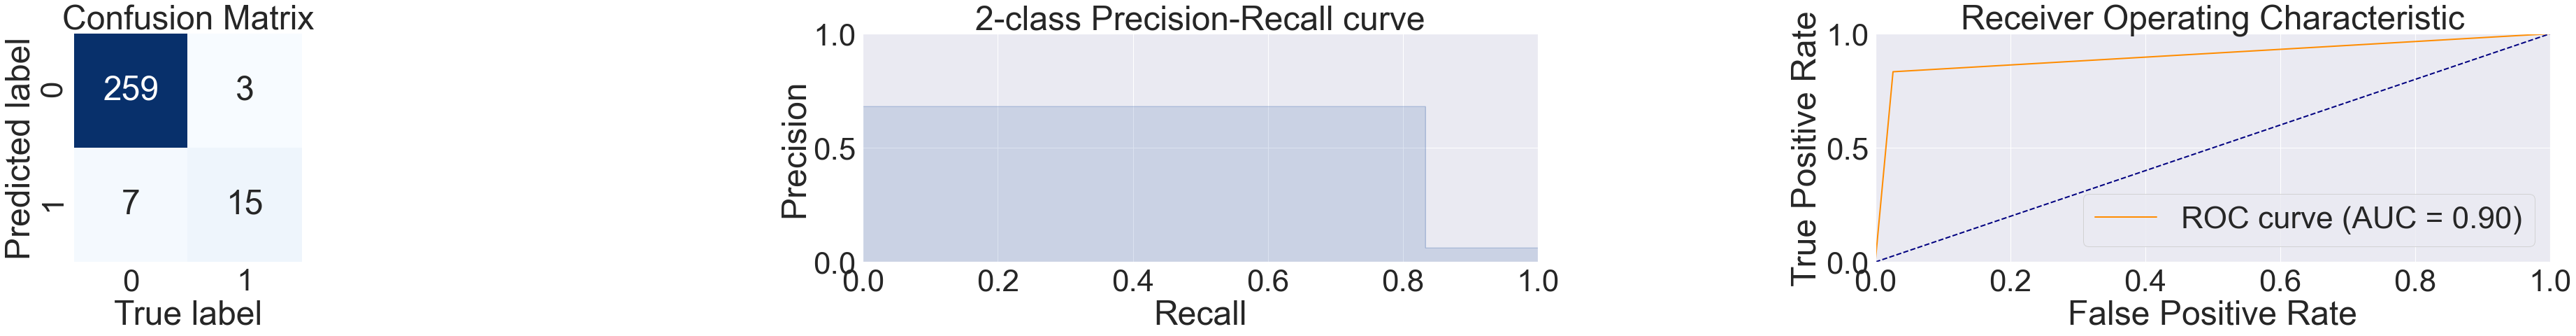

In [189]:
show_summary_report(y_test2,xgboost2_pred);

###### This result goes hand in hand with SHAP model interpretability. 
We can see that the metrics results are the same as the xgboost model with all the features.

# Nural Networks

In [145]:
mlp = MLPClassifier(max_iter=800, random_state=32)

In [146]:
parameter_space = {
    'learning_rate_init': [.001],
    'hidden_layer_sizes': [ (15,5)],
    'activation': ['logistic'],
     'max_iter':[700],
    'solver': ['lbfgs'],
    'alpha': [6e-4],
    'learning_rate': ['invscaling'],
    'random_state':[42]
}

In [147]:
gs_mlp = GridSearchCV(mlp, parameter_space, n_jobs=2, cv=20)
gs_mlp.fit(X_train2, y_train2)

GridSearchCV(cv=20, estimator=MLPClassifier(max_iter=800, random_state=32),
             n_jobs=2,
             param_grid={'activation': ['logistic'], 'alpha': [0.0006],
                         'hidden_layer_sizes': [(15, 5)],
                         'learning_rate': ['invscaling'],
                         'learning_rate_init': [0.001], 'max_iter': [700],
                         'random_state': [42], 'solver': ['lbfgs']})

In [184]:
gs_mlp_pred = gs_mlp.predict(X_test2)

In [149]:
mlp_loss = log_loss(y_test2, gs_mlp.predict_proba(X_test2))
mlp_loss

0.08986338475511353

Accuracy : 0.9683 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6957 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8889 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9313                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


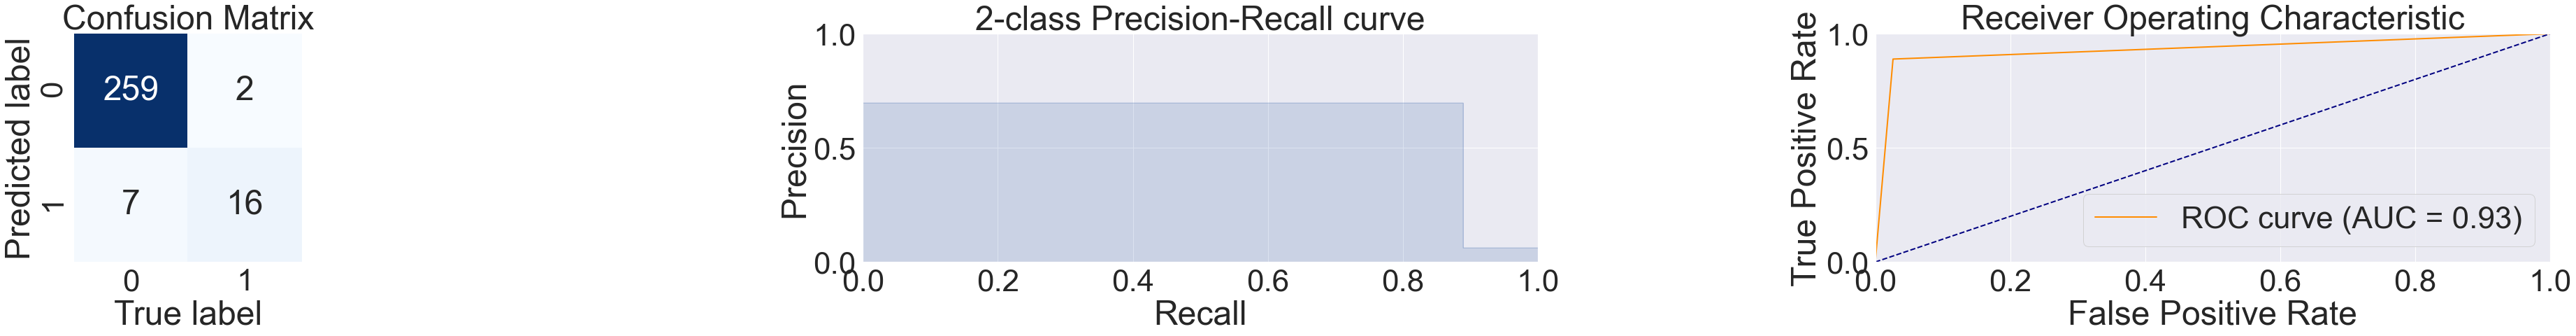

In [183]:
show_summary_report(y_test2,gs_mlp_pred);

This model was able to “find” 89% of the women with cancer (recall),
and 70% of its predictions of cancer were correct (precision).

# Rendom Forest

In [94]:
randomforest2 = RandomForestClassifier(random_state=10, n_jobs=-1)
randomforest2_param_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy' ],
    'max_depth': [2, 3, 4],
    'n_estimators': [20, 40, 50, 60, 80, 100, 200]}


In [95]:
gs_randomforest2 = GridSearchCV(randomforest2, 
                                  param_grid = randomforest2_param_grid, 
                                  scoring = 'recall',
                                  cv=5,
                                  return_train_score=True)

In [96]:
gs_randomforest2.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [20, 40, 50, 60, 80, 100, 200]},
             return_train_score=True, scoring='recall')

In [182]:
randomforest2_pred = gs_randomforest2.predict(X_test2)

In [100]:
randomforest2_loss = log_loss(y_test2, gs_randomforest2.predict_proba(X_test2))
randomforest2_loss

0.28048913700055916

Accuracy : 0.9683 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6957 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8889 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9313                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


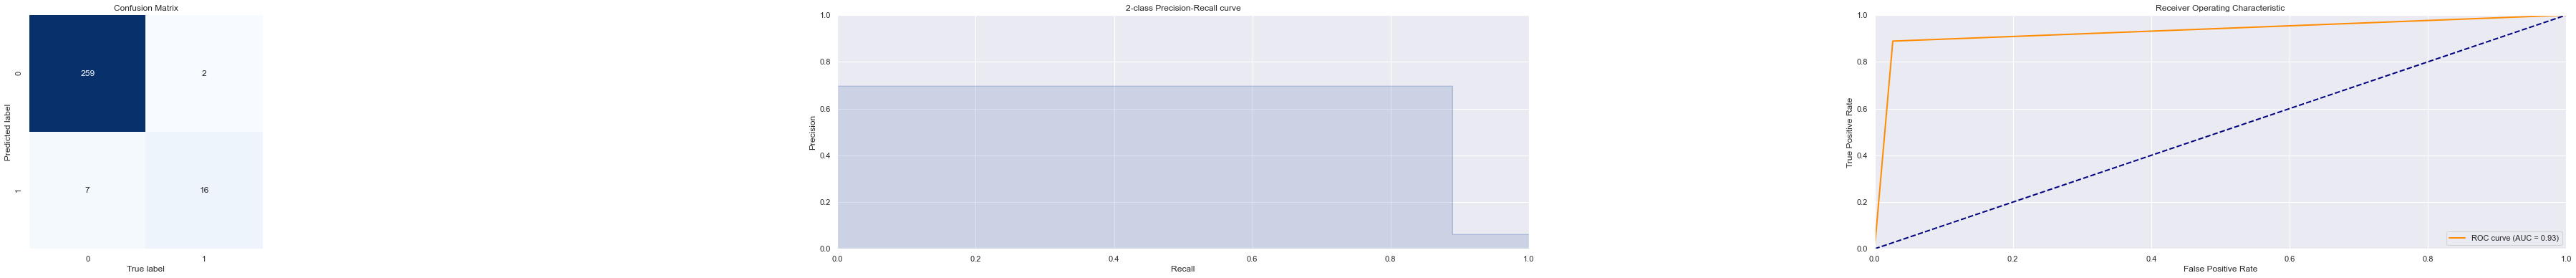

In [101]:
show_summary_report(y_test,randomforest2_pred);

In [102]:
fn=X_test2.columns

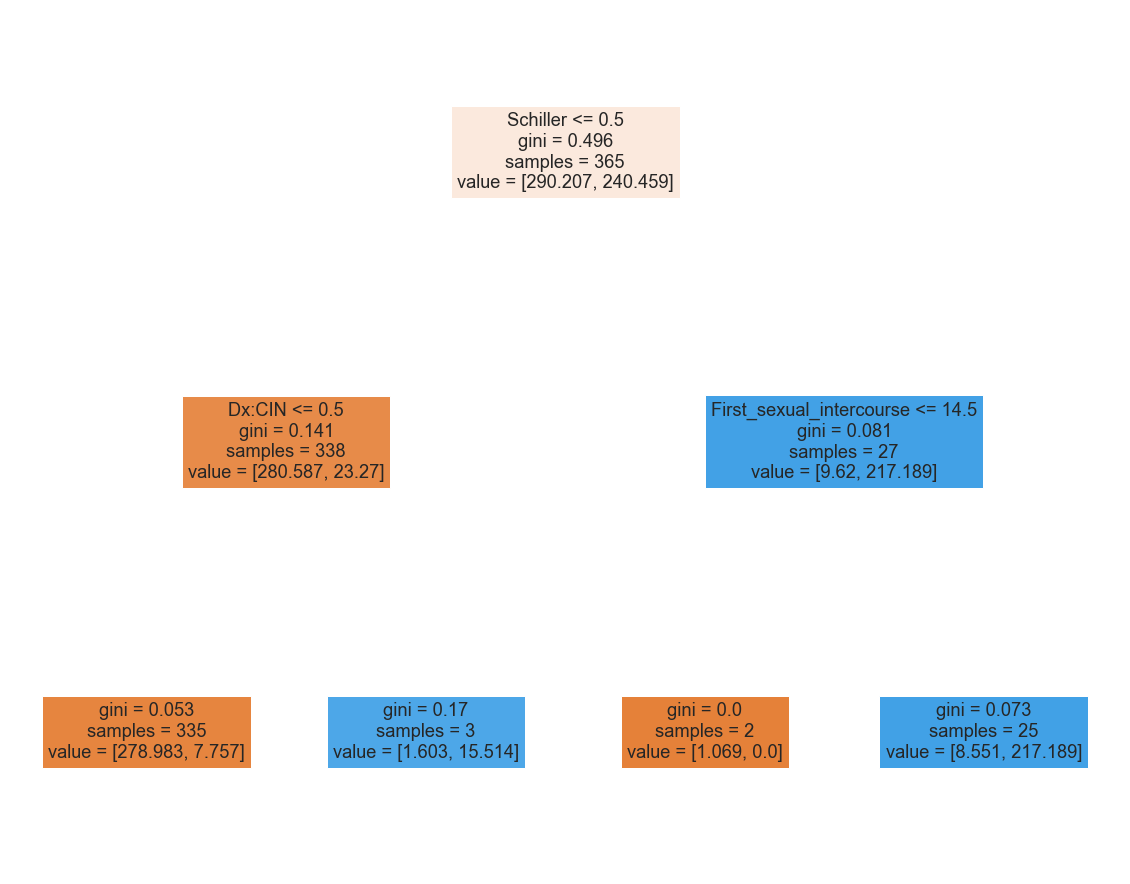

In [103]:
plt.figure(figsize=(20,16))
_ = tree.plot_tree(gs_randomforest2.best_estimator_[0], feature_names=fn, filled = True)

## Reduced features Models result table:

In [190]:
sns.set(style='darkgrid',font_scale=4 )
reduced_features_models_results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC', 'LOG_LOSS'])
reduced_features_models = ['XGboost','Random Forest', 'NN']
for i, m in enumerate([gs_xgboost2 , gs_randomforest2,gs_mlp]):
   
    accuracy_ = accuracy_score(y_test2, m.predict(X_test2))
    precision_ = precision_score(y_test2, m.predict(X_test2))
    recall_ = recall_score(y_test2, m.predict(X_test2))
    roc_auc_ = roc_auc_score(y_test2, m.predict(X_test2))
    log_loss_ = log_loss(y_test2, m.predict_proba(X_test2))
    
    # keep the results
    reduced_features_models_results.loc[i] = {'Model': reduced_features_models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_,
                       'LOG_LOSS': log_loss_}





In [191]:
reduced_features_models_results

Model  Accuracy  Precision    Recall   ROC_AUC  LOG_LOSS
0        XGboost  0.964789   0.681818  0.833333  0.903509  0.256115
1  Rendom Forest  0.968310   0.695652  0.888889  0.931287  0.280489
2             NN  0.968310   0.695652  0.888889  0.931287  0.089863

From the above table we can see the the best model is an MLPClassifier.

# Reduced Features + Resempled DATA

In [110]:
sm = SMOTENC(random_state=42, categorical_features=[1, 2])
X_train2_res, y_train2_res = sm.fit_resample(X_train2, y_train2)

# XGBOOST

In [157]:
tree_para = {'criterion':['gini'],'max_depth':[2,4,6,10], 'n_estimators':(10, 100, 400)}
gs_xgboost2_res = GridSearchCV(xgb.XGBClassifier({'booster': 'gblinear', 'lambda': 0.9859432773400324, 'alpha': 0.017026435411948912, 'max_depth': 7, 'eta': 0.4668409246460422, 'gamma': 0.001407992068793587, 'grow_policy': 'depthwise'}), tree_para, cv=10)

In [158]:
gs_xgboost2_res.fit(X_train2_res,y_train2_res)

GridSearchCV(cv=10,
             estimator=XGBClassifier(max_depth={'alpha': 0.017026435411948912,
                                                'booster': 'gblinear',
                                                'eta': 0.4668409246460422,
                                                'gamma': 0.001407992068793587,
                                                'grow_policy': 'depthwise',
                                                'lambda': 0.9859432773400324,
                                                'max_depth': 7}),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 4, 6, 10],
                         'n_estimators': (10, 100, 400)})

In [159]:
xgboost2_res_pred = gs_xgboost2_res.predict(X_test2)

In [160]:
xgboost2_res_loss = log_loss(y_test2, gs_xgboost2_res.predict_proba(X_test2))
xgboost2_res_loss

0.1483953042930602

Accuracy : 0.9648 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6818 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8333 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9035                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


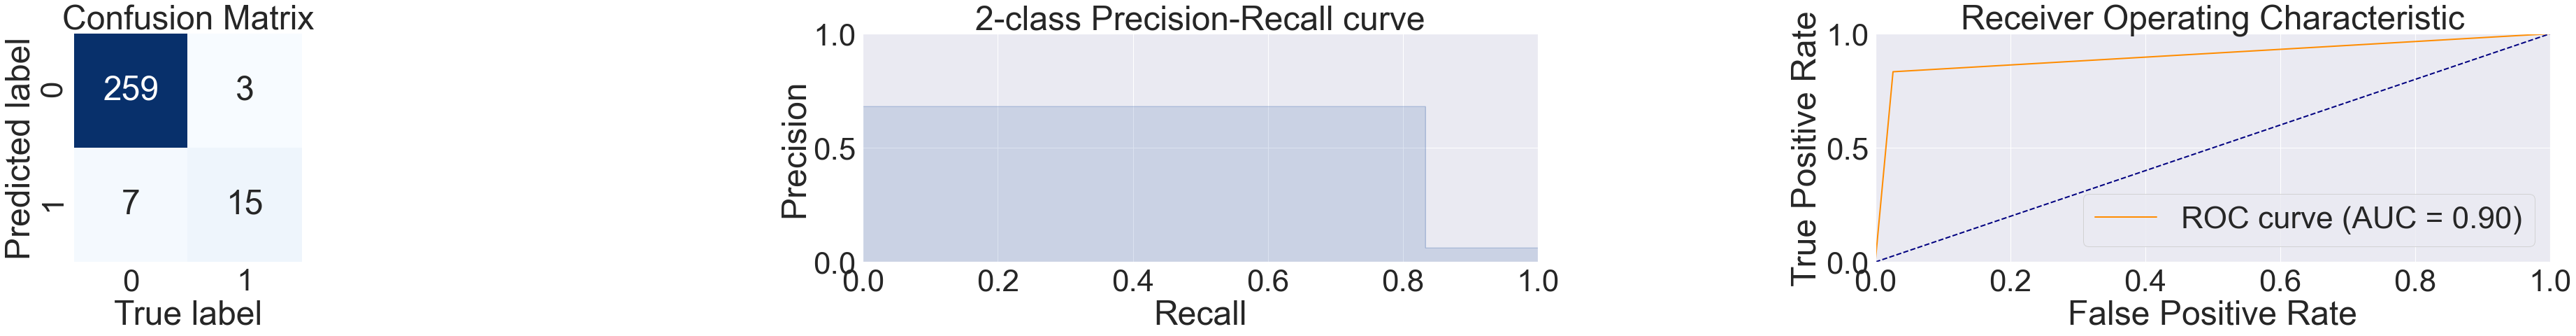

In [161]:
show_summary_report(y_test2,xgboost2_pred);

# Nural Networks

In [164]:
mlp = MLPClassifier(max_iter=800, random_state=32)

In [165]:
parameter_space = {
    'learning_rate_init': [.001],
    'hidden_layer_sizes': [ (15,5)],
    'activation': ['logistic'],
     'max_iter':[700],
    'solver': ['lbfgs'],
    'alpha': [6e-4],
    'learning_rate': ['invscaling'],
    'random_state':[42]
}

In [166]:
gs_mlp_res = GridSearchCV(mlp, parameter_space, n_jobs=2, cv=20)
gs_mlp_res.fit(X_train2_res, y_train2_res)

/Users/doron/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=20, estimator=MLPClassifier(max_iter=800, random_state=32),
             n_jobs=2,
             param_grid={'activation': ['logistic'], 'alpha': [0.0006],
                         'hidden_layer_sizes': [(15, 5)],
                         'learning_rate': ['invscaling'],
                         'learning_rate_init': [0.001], 'max_iter': [700],
                         'random_state': [42], 'solver': ['lbfgs']})

In [167]:
gs_mlp_res_pred = gs_mlp_res.predict(X_test2)

In [168]:
mlp_res_loss = log_loss(y_test2, gs_mlp_res.predict_proba(X_test2))
mlp_res_loss

0.2193158108775516

Accuracy : 0.9577 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6154 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8889 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9256                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


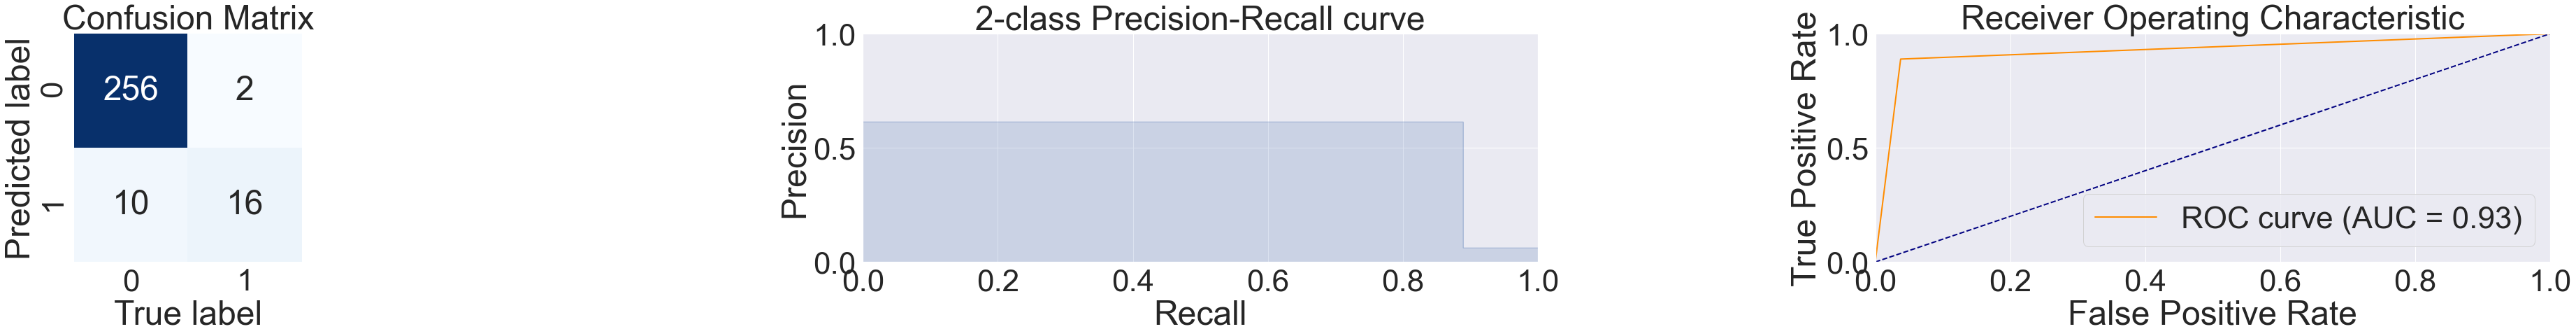

In [169]:
show_summary_report(y_test2,gs_mlp_res_pred);

# Rendom Forest

In [129]:
forest = RandomForestClassifier(random_state=10, n_jobs=-1)
forest_param_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy' ],
    'max_depth': [2, 3, 4],
    'n_estimators': [20, 40, 50, 60, 80, 100, 200]}
gs_randomforest2_res = GridSearchCV(forest, 
                                  param_grid = forest_param_grid, 
                                  scoring = 'recall',
                                  cv=5,
                                  return_train_score=True)

In [130]:
gs_randomforest2_res.fit(X_train2_res, y_train2_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [20, 40, 50, 60, 80, 100, 200]},
             return_train_score=True, scoring='recall')

In [131]:
gs_randomforest2_pred = forest_grid_search.predict(X_test2)

In [132]:
randomforest2_res_loss = log_loss(y_test2, gs_randomforest2_res.predict_proba(X_test2))
randomforest2_res_loss

0.28301629175632587

Accuracy : 0.9683 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6957 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8889 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9313                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


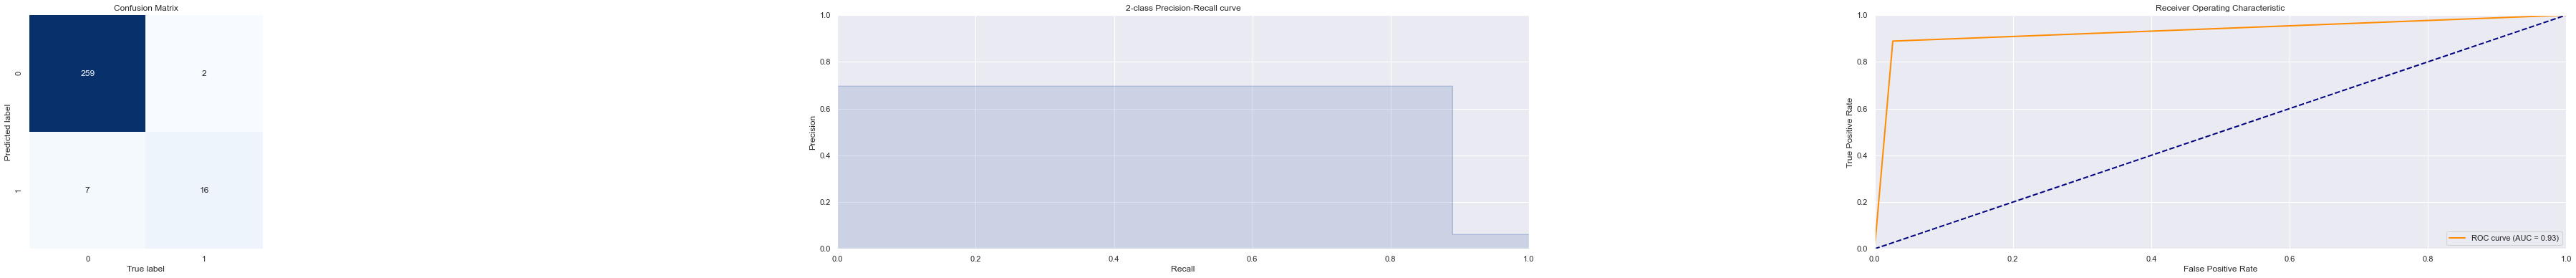

In [124]:
show_summary_report(y_test,gs_randomforest2_res);

In [133]:
fn = X_test2.columns

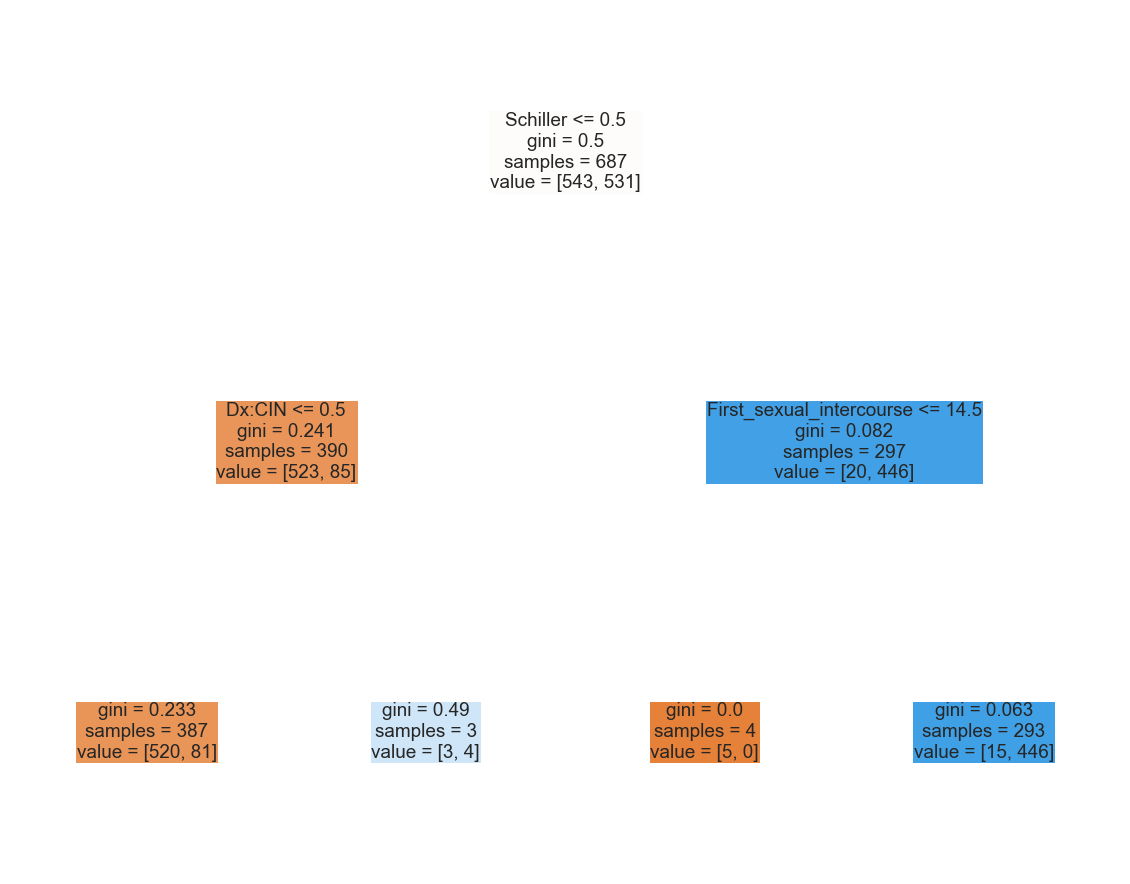

In [206]:
plt.figure(figsize=(20,16))
_ = tree.plot_tree(forest_grid_search.best_estimator_[0], feature_names=fn, filled = True)

# Reduced features and Resampled Models result table:

In [179]:
sns.set(style='darkgrid',font_scale=4 )
reduced_features_res_models_results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC', 'LOG_LOSS'])
reduced_features_res_models = ['XGboost','Random Forest', 'NN']
for i, m in enumerate([gs_xgboost2_res , gs_randomforest2_res,gs_mlp_res]):
   
    accuracy_ = accuracy_score(y_test2, m.predict(X_test2))
    precision_ = precision_score(y_test2, m.predict(X_test2))
    recall_ = recall_score(y_test2, m.predict(X_test2))
    roc_auc_ = roc_auc_score(y_test2, m.predict(X_test2))
    log_loss_ = log_loss(y_test2, m.predict_proba(X_test2))
    
    # keep the results
    reduced_features_res_models_results.loc[i] = {'Model': reduced_features_res_models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_,
                       'LOG_LOSS': log_loss_}





# Final Conclusions

# Metric Evaluation Models All Features

In [193]:
models_results

Model  Accuracy  Precision    Recall   ROC_AUC  LOG_LOSS
0  Logisic Regression  0.957746   0.687500  0.611111  0.796157  0.134704
1       Rendom Forest  0.947183   0.636364  0.388889  0.686926  0.317942
2             XGboost  0.964789   0.681818  0.833333  0.903509  0.256115
3                 SVC  0.957746   0.636364  0.777778  0.873851  0.128972

# Metric Evaluation Models Reduced Features

In [192]:
reduced_features_models_results

Model  Accuracy  Precision    Recall   ROC_AUC  LOG_LOSS
0        XGboost  0.964789   0.681818  0.833333  0.903509  0.256115
1  Rendom Forest  0.968310   0.695652  0.888889  0.931287  0.280489
2             NN  0.968310   0.695652  0.888889  0.931287  0.089863

# Metric Evaluation Models Reduced Features and Resampled Training Data

In [180]:
reduced_features_res_models_results

Model  Accuracy  Precision    Recall   ROC_AUC  LOG_LOSS
0        XGboost  0.964789   0.700000  0.777778  0.877611  0.148395
1  Rendom Forest  0.968310   0.695652  0.888889  0.931287  0.283016
2             NN  0.957746   0.615385  0.888889  0.925647  0.219316

From the above tables we can see the best performing models are Rendom Forest and MLPClassifier


# Winner

##### MLP Classifier - NN

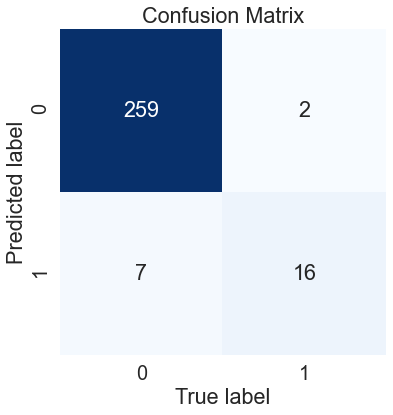

In [219]:
sns.set(font_scale=1.8)
mat = confusion_matrix(gs_mlp_pred,y_test)

fig, ax = plt.subplots(figsize = (6, 6))


    # Confusion Matrix
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax,)

ax.set_title('Confusion Matrix');
ax.set_xlabel('True label');
ax.set_ylabel('Predicted label');

###### final conclusion: 
The Artificial Neural Network model performed very well and can 
improve, complement and enhance the visual screening process.
Its log_loss metric was better then the Rendom Forst wich made it the final winner.
Also number of false negative droped from 3 to 2
